<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
#!conda install geopandas
#!conda install geopy

#!pip install geopandas
#!#pip install geopy

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
%config InlineBackend.figure_format = 'retina'


In [142]:
# Create a data directory
shapedir='/Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/'

In [143]:
text = !ls /Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/
text[10:16]

['BAG-Woonplaatsgrenzen.qpj',
 'BAG-Woonplaatsgrenzen.shp',
 'BAG-Woonplaatsgrenzen.shx',
 'BAG-Woonplaatsgrenzen.txt',
 'CBS_PC4_2017_v1.cpg',
 'CBS_PC4_2017_v1.dbf']

In [144]:
# read files
file = 'gemeente_2021_v1.shp' 
fp = shapedir+file
# or
# fp = f'{shapedir}BAG-Woonplaatsgrenzen.shp'
#or
fp_ = shapedir+'nl_imergis_kustlijn_2018.shp'
fp__ = shapedir+'ESRI-PC4-2017R1.shp'

# create geopandas
map_df_woonplaats = gpd.read_file(fp)
map_df_kustlijn = gpd.read_file(fp_)
map_df_pc4 = gpd.read_file(fp__)

In [145]:
WoonKernen = shapedir+'Top10NL-Plaats_kern.shp'

map_df_woonkernen = gpd.read_file(WoonKernen)

In [146]:
provincies = shapedir+'2019_provinciegrenzen_watergrenzen.gpkg'

map_df_provincies = gpd.read_file(provincies)

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [147]:
roads = shapedir+'nwb-light.shp'

map_df_roads = gpd.read_file(roads)

In [148]:
rail = shapedir+'Top10NL_Spoorwegen.shp'

map_df_rail = gpd.read_file(rail)

In [149]:
# get the communal boundaries
# gemeenten = shapedir+'2019_gemeentegrenzen_kustlijn.gpkg'

map_df = gpd.read_file('/Users/maartenk/Downloads/WijkBuurtkaart_2021_v1/gemeente_2021_v1.shp')


In [150]:
# get the communal boundaries
gemeenten = shapedir+'2019_gemeentegrenzen_kustlijn.gpkg'

map_df_gemeenten = gpd.read_file(gemeenten)


/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [151]:
map_df_gemeenten.head(2)

id  gid  code gemeentenaam  \
0   2   14  1719    Drimmelen   
1   3   15  0614   Westvoorne   

                                            geometry  
0  MULTIPOLYGON (((107416.617 415030.810, 107671....  
1  MULTIPOLYGON (((62182.934 438381.125, 62209.30...

In [152]:
import pandas as pd
# df = pd.read_csv('/Users/maartenk/Documents/git/CookBooks/CoViD19nL.csv', sep=';')
# df.shape

In [52]:
import pandas as pd
df = pd.read_csv('/Users/maartenk/Documents/git/CookBooks/Sources/COVID-19_aantallen_gemeente_per_dag (original).csv', sep=';')
df.shape

(259686, 12)

In [53]:
df.columns

Index(['Date_of_report', 'Date_of_publication', 'Municipality_code',
       'Municipality_name', 'Province', 'Security_region_code',
       'Security_region_name', 'Municipal_health_service', 'ROAZ_region',
       'Total_reported', 'Hospital_admission', 'Deceased'],
      dtype='object')

In [155]:
groupedGem= df.groupby('Municipality_code').sum()

In [156]:
groupedGem

Total_reported  Hospital_admission  Deceased
Municipality_code                                              
GM0014                      35561                 142        63
GM0034                      42823                 452       124
GM0037                       4993                  41        23
GM0047                       3691                  21        19
GM0050                       3900                  27        17
...                           ...                 ...       ...
GM1966                       7921                  51        37
GM1969                       8263                  47        36
GM1970                       8656                  86        57
GM1978                      11108                  65        44
GM1979                       5298                  59        29

[352 rows x 3 columns]

In [157]:
map_df_combined = pd.merge(map_df_woonplaats, groupedGem, left_on=map_df_woonplaats['GM_CODE'], 
                           right_on=groupedGem.index.astype(str))

In [158]:
# map_df_combined = pd.merge(map_df_woonplaats, groupedGem, left_on=map_df_woonplaats['GM_CODE'], right_on=groupedGem['Municipality_code'].astype(str))

In [159]:
groupedGem.columns

Index(['Total_reported', 'Hospital_admission', 'Deceased'], dtype='object')

In [160]:
map_df_combined['CovDens']= map_df_combined['Total_reported']/map_df_combined['AANT_INW']

In [161]:
grouped = df.groupby('Date_of_publication').sum()

In [162]:
map_df_combined['CovDensPm'] = map_df_combined['CovDens']*1000000

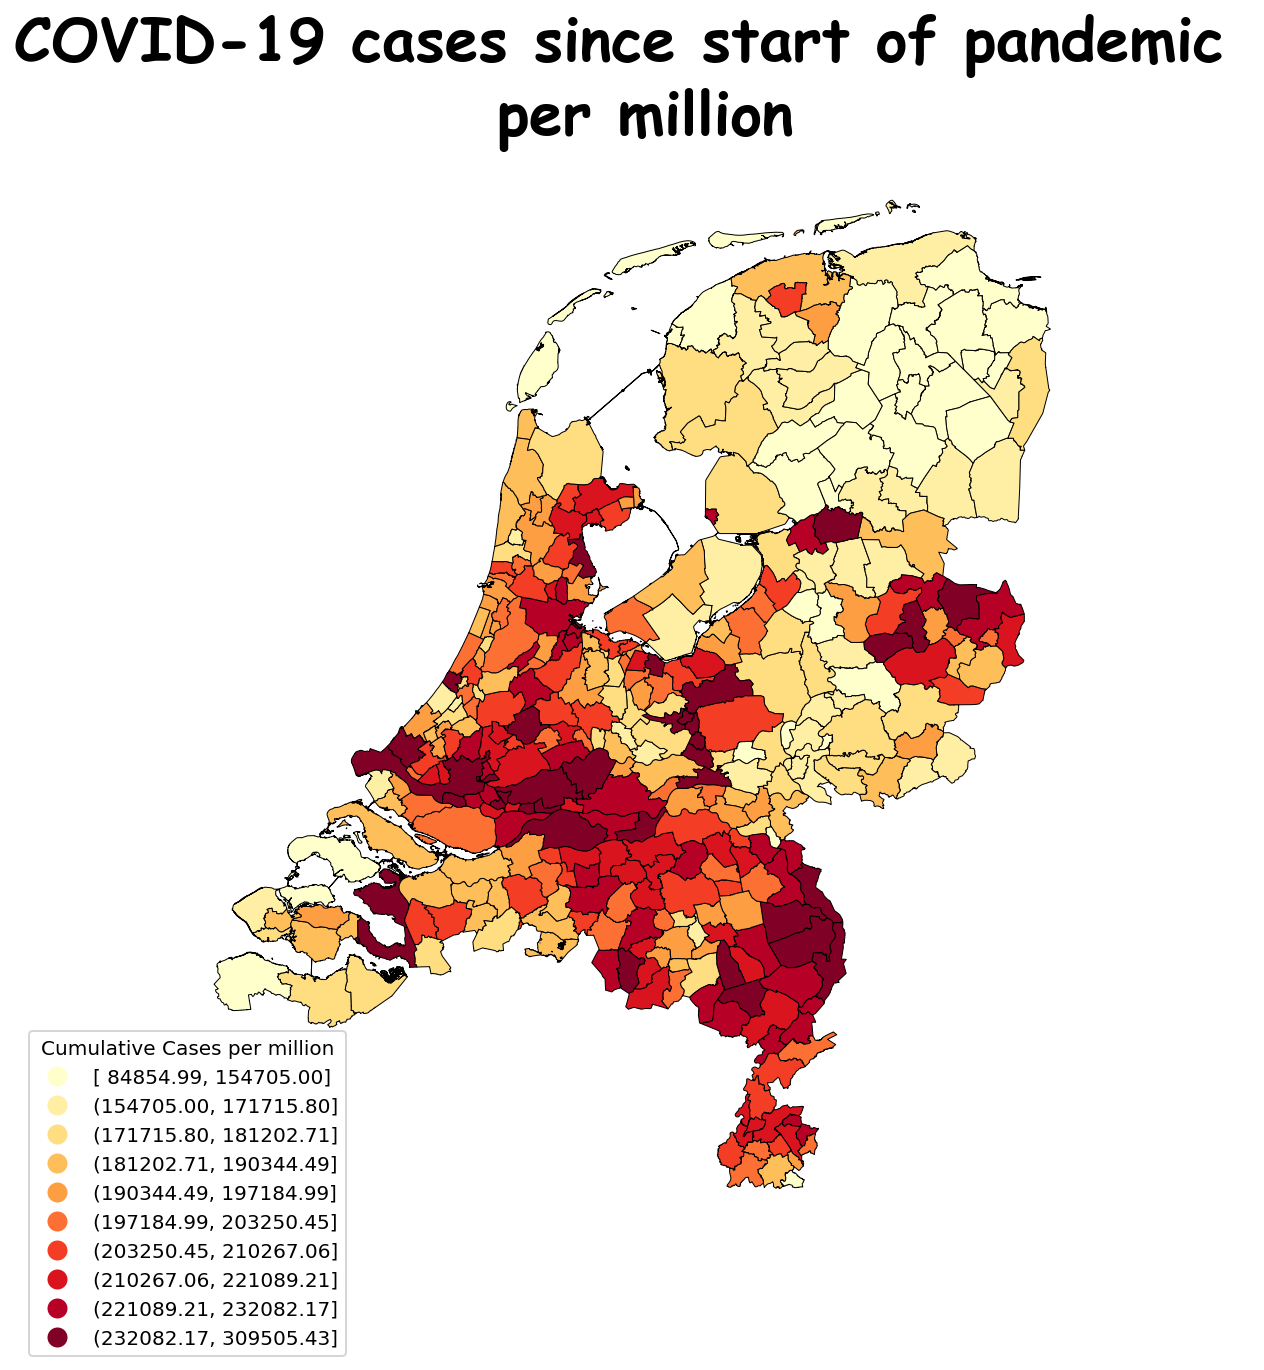

In [163]:
#plot the density
plt.figure(figsize=(10,10))
ax = plt.axes()

ax.axis('off')


map_df_combined.loc[map_df_combined['CovDensPm']>0].plot(column='CovDensPm', 
                cmap='YlOrRd',#'tab20', 
                label=map_df_combined['CovDensPm'], 
                scheme='quantiles',
                legend=True,
                k=10,
                                                       ec='black',
                                                         lw=.5,
                ax=ax)
plt.title('COVID-19 cases since start of pandemic \n per million', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative Cases per million');

In [164]:
map_df_combined['HostDens']= (map_df_combined['Hospital_admission']/map_df_combined['AANT_INW'])*1000000

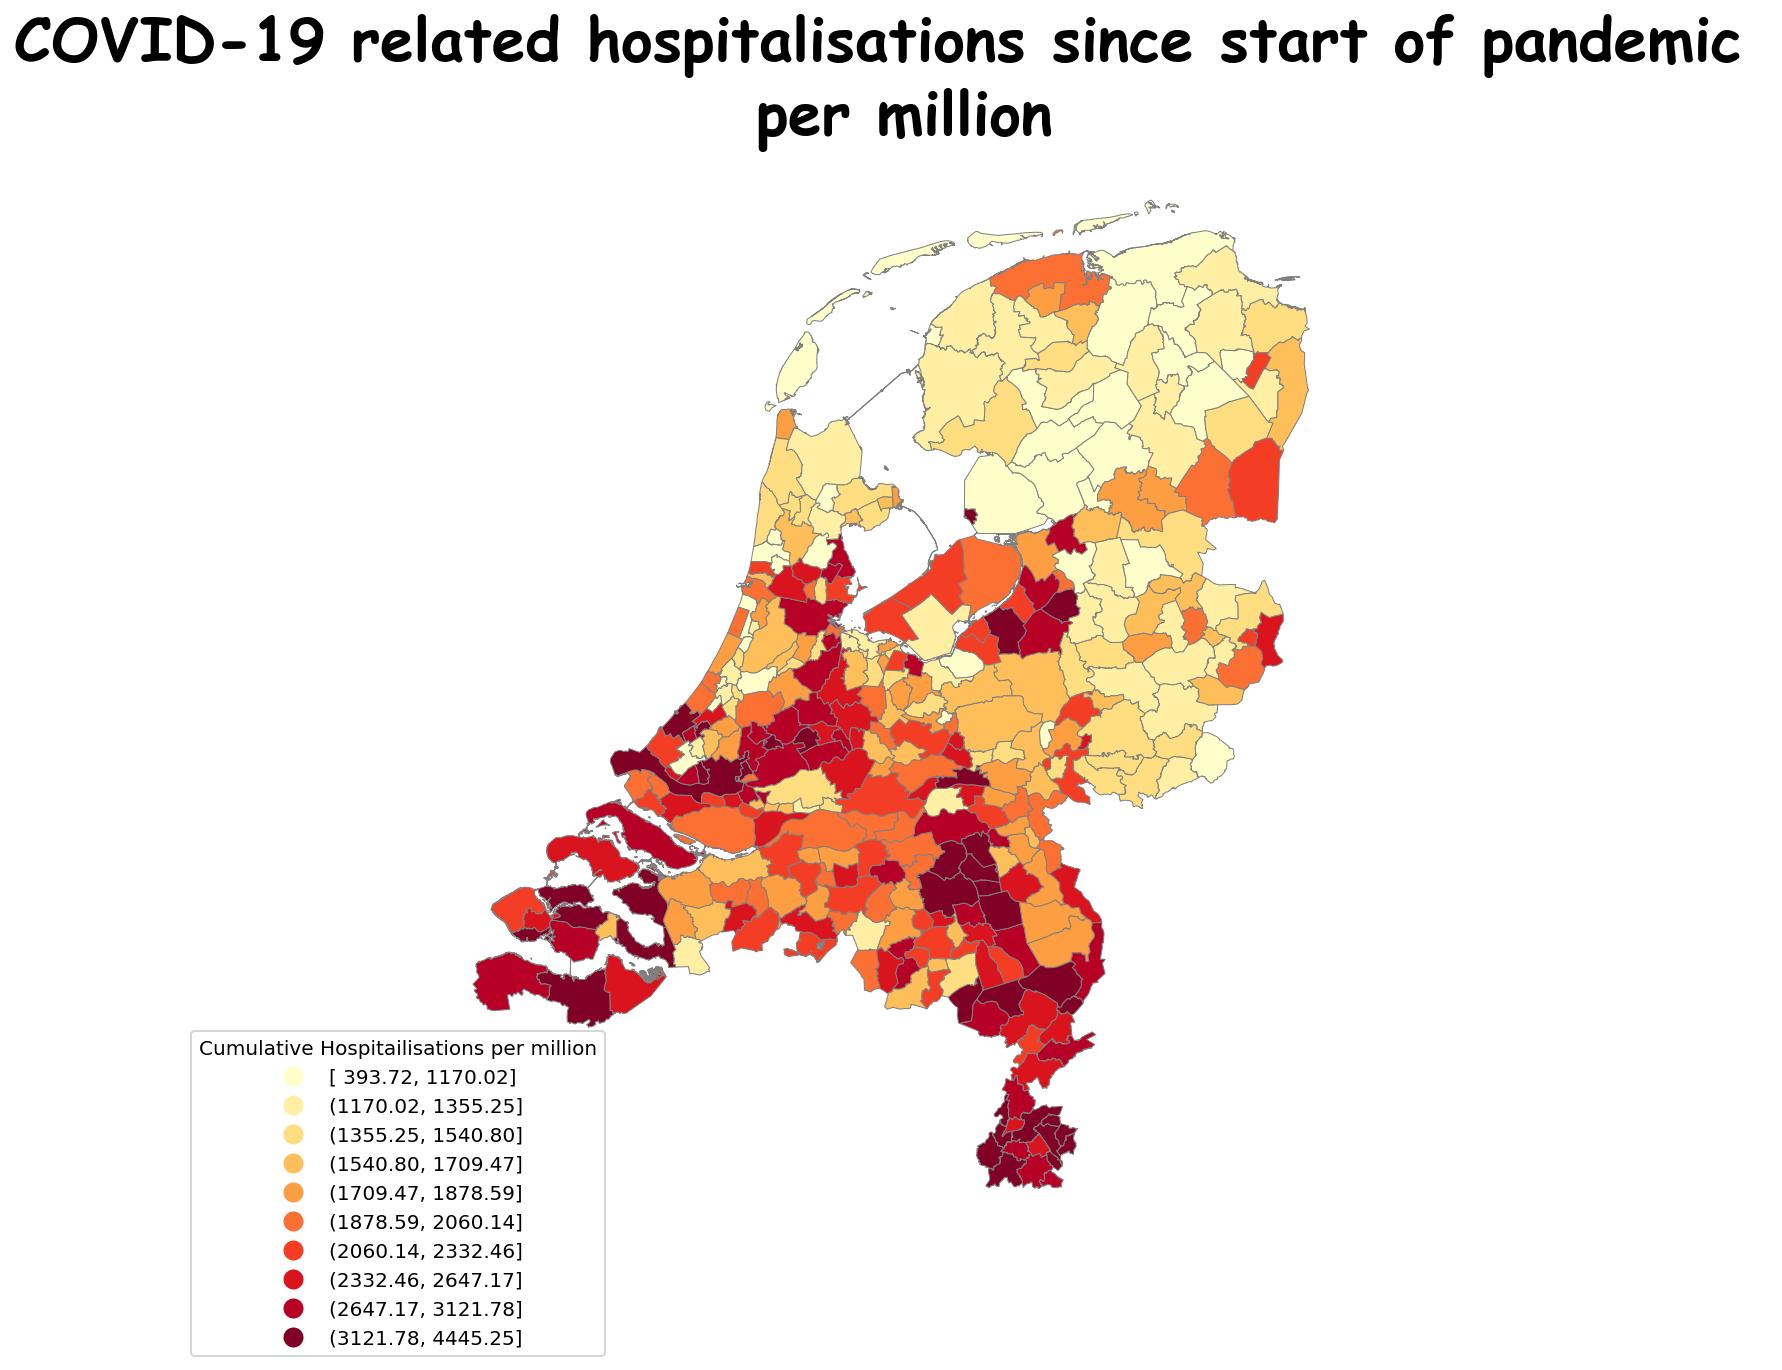

In [165]:
#plot the density
plt.figure(figsize=(10,10))
ax = plt.axes()

ax.axis('off')

map_df_combined.loc[map_df_combined['HostDens']>0].plot(column='HostDens', 
                cmap='YlOrRd',#'tab20', 
                label=map_df_combined['HostDens'], 
                scheme='quantiles',
                legend=True,
                k=10,
                                                       ec='grey',
                                                        lw=.5,
                ax=ax)
plt.title('COVID-19 related hospitalisations since start of pandemic \n per million', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative Hospitailisations per million');

In [166]:
map_df_combined['DecDens']= (map_df_combined['Deceased']/map_df_combined['AANT_INW'])*1000000

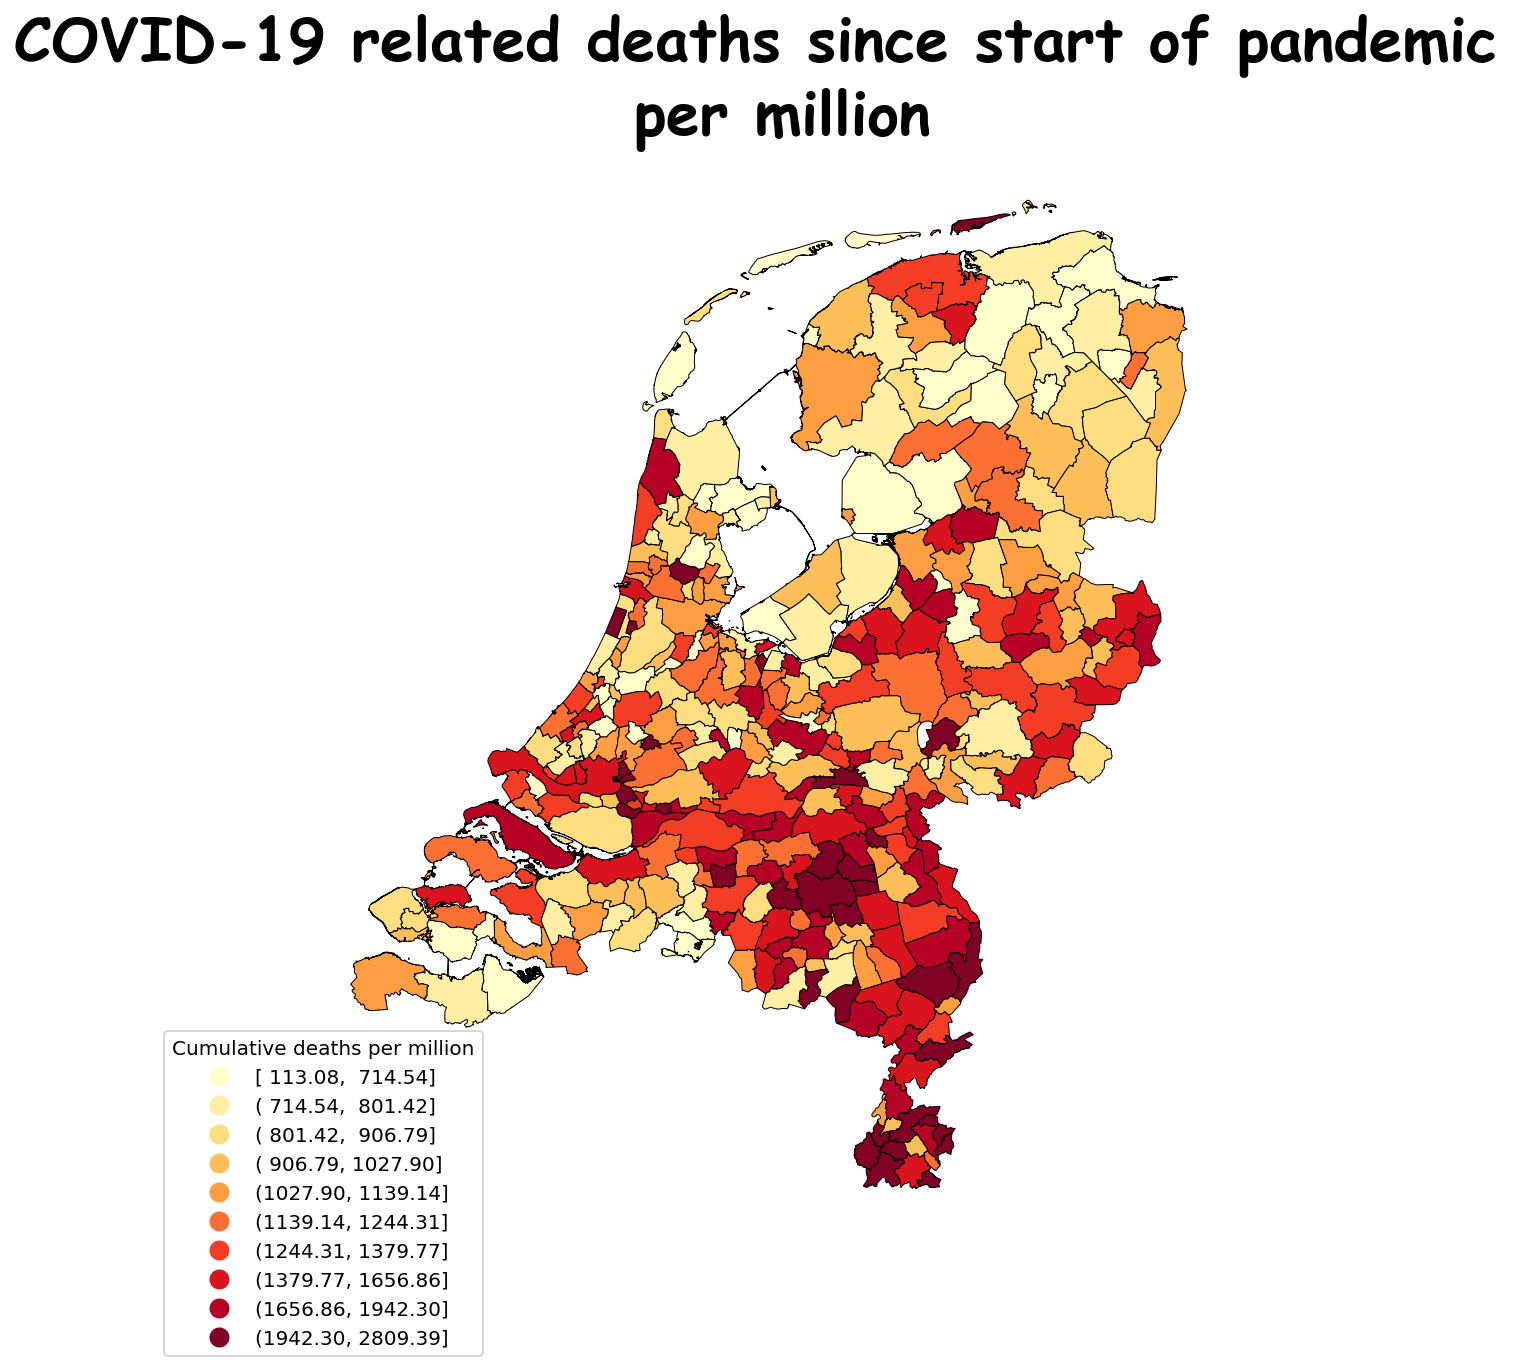

In [167]:
#plot the density
plt.figure(figsize=(10,10))
ax = plt.axes()

ax.axis('off')

map_df_combined.loc[map_df_combined['DecDens']>0].plot(column='DecDens', 
                cmap='YlOrRd',#'tab20', 
                label=map_df_combined['DecDens'], 
                scheme='quantiles',
                legend=True,
                k=10,
                                                       ec='black',
                                                       lw=.5,
                ax=ax)
plt.title('COVID-19 related deaths since start of pandemic \n per million', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative deaths per million');

In [168]:
len(df['Municipality_name'].unique())

353

In [169]:
map_df_gemeenten['gemeentenaam']

0             Drimmelen
1            Westvoorne
2          Scherpenzeel
3         Gulpen-Wittem
4            Hardenberg
             ...       
350       Echt-Susteren
351          Beekdaelen
352              Altena
353         West Betuwe
354    Vijfheerenlanden
Name: gemeentenaam, Length: 355, dtype: object

In [170]:
set(df['Municipality_name']).intersection(map_df_gemeenten['gemeentenaam'])

{"'s-Gravenhage",
 "'s-Hertogenbosch",
 'Aa en Hunze',
 'Aalsmeer',
 'Aalten',
 'Achtkarspelen',
 'Alblasserdam',
 'Albrandswaard',
 'Alkmaar',
 'Almelo',
 'Almere',
 'Alphen aan den Rijn',
 'Alphen-Chaam',
 'Altena',
 'Ameland',
 'Amersfoort',
 'Amstelveen',
 'Amsterdam',
 'Apeldoorn',
 'Arnhem',
 'Assen',
 'Asten',
 'Baarle-Nassau',
 'Baarn',
 'Barendrecht',
 'Barneveld',
 'Beek',
 'Beekdaelen',
 'Beemster',
 'Beesel',
 'Berg en Dal',
 'Bergeijk',
 'Bergen (L.)',
 'Bergen (NH.)',
 'Bergen op Zoom',
 'Berkelland',
 'Bernheze',
 'Best',
 'Beuningen',
 'Beverwijk',
 'Bladel',
 'Blaricum',
 'Bloemendaal',
 'Bodegraven-Reeuwijk',
 'Boekel',
 'Borger-Odoorn',
 'Borne',
 'Borsele',
 'Boxmeer',
 'Boxtel',
 'Breda',
 'Brielle',
 'Bronckhorst',
 'Brummen',
 'Brunssum',
 'Bunnik',
 'Bunschoten',
 'Buren',
 'Capelle aan den IJssel',
 'Castricum',
 'Coevorden',
 'Cranendonck',
 'Cuijk',
 'Culemborg',
 'Dalfsen',
 'Dantumadiel',
 'De Bilt',
 'De Fryske Marren',
 'De Ronde Venen',
 'De Wolden',
 'D

In [171]:
set(df['Municipality_name']).symmetric_difference(map_df_gemeenten['gemeentenaam'])
# set([1, 2]).symmetric_difference(set([2, 3]))

{'Appingedam',
 'Delfzijl',
 'Eemsdelta',
 'Haaren',
 'Hengelo',
 'Hengelo (O.)',
 'Loppersum',
 nan}

In [172]:
set(df['Municipality_name'])-set(map_df_gemeenten['gemeentenaam'])



{'Eemsdelta', 'Hengelo (O.)', nan}

In [173]:
set(map_df_gemeenten['gemeentenaam'])-set(df['Municipality_name'])



{'Appingedam', 'Delfzijl', 'Haaren', 'Hengelo', 'Loppersum'}

In [174]:
import shapely
shapely.geos.geos_version

(3, 8, 0)

In [175]:
type(map_df_combined)

geopandas.geodataframe.GeoDataFrame

In [54]:
groupedDate= df.groupby('Date_of_publication').sum()

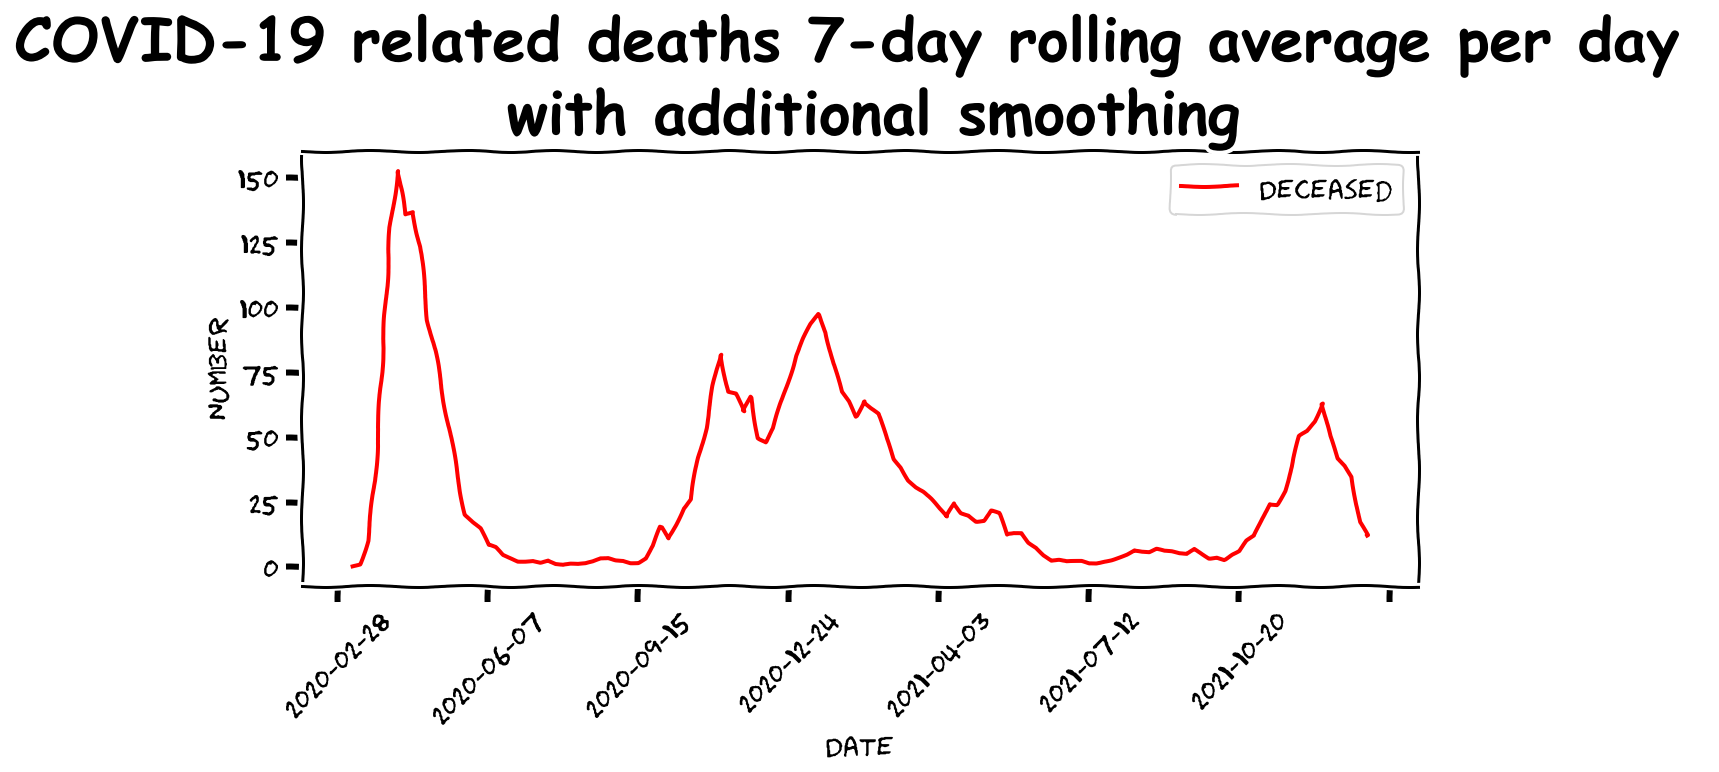

In [242]:
# plt.xkcd();
groupedDate['Deceased'].rolling(7).mean()[::5].plot(legend=True, c='red', figsize=(10,4))
# groupedDate['Hospital_admission'].rolling(7).mean()[::5].plot(legend=True, c='blue', figsize=(10,4))
# groupedDate['Total_reported'].rolling(7).mean()[::5].plot(legend=True, c='red', figsize=(10,4))

plt.title('COVID-19 related deaths 7-day rolling average per day \n with additional smoothing', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative deaths per million')
plt.ylabel('Number')
plt.xlabel('Date')
plt.xticks(rotation=45);

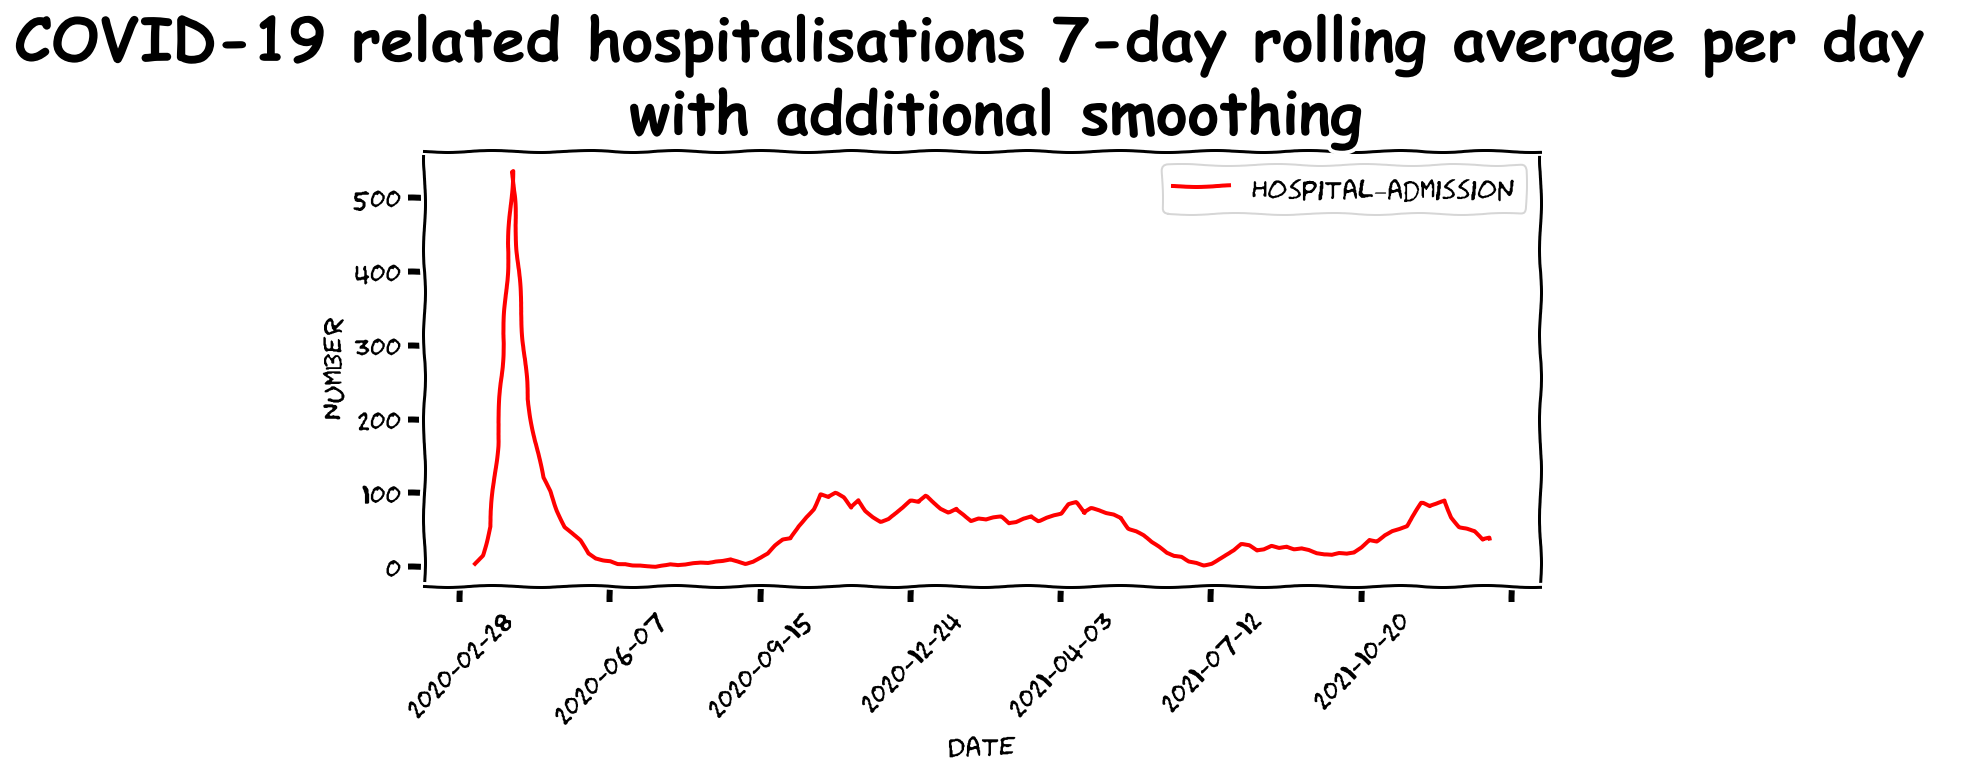

In [192]:
# plt.xkcd();
groupedDate['Hospital_admission'].rolling(7).mean()[::5].plot(legend=True, c='red', figsize=(10,4))
plt.title('COVID-19 related hospitalisations 7-day rolling average per day \n with additional smoothing', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative deaths per million')
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=45);

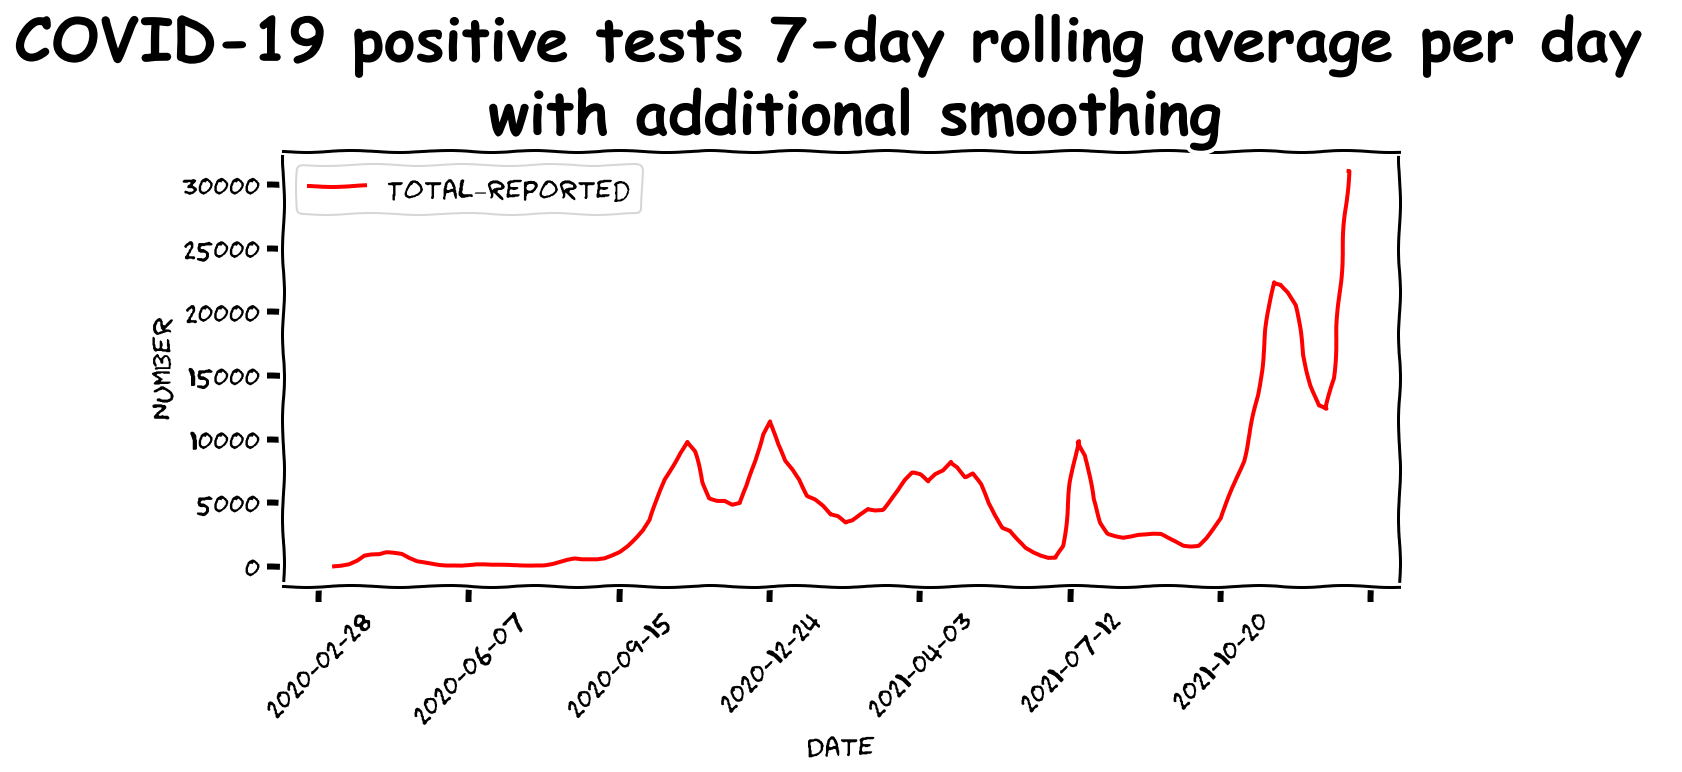

In [191]:
# plt.xkcd();
groupedDate['Total_reported'].rolling(7).mean()[::5].plot(legend=True, c='red', figsize=(10,4))

plt.title('COVID-19 positive tests 7-day rolling average per day \n with additional smoothing', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative deaths per million')
plt.xlabel('Date')
plt.ylabel('Number')
plt.xticks(rotation=45);

In [195]:
from sklearn.preprocessing import StandardScaler 
import pandas as pd

std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(groupedDate.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Total_reported','Hospital_admission','Deceased'], index = groupedDate.index)

Text(0.5, 0, 'Date')

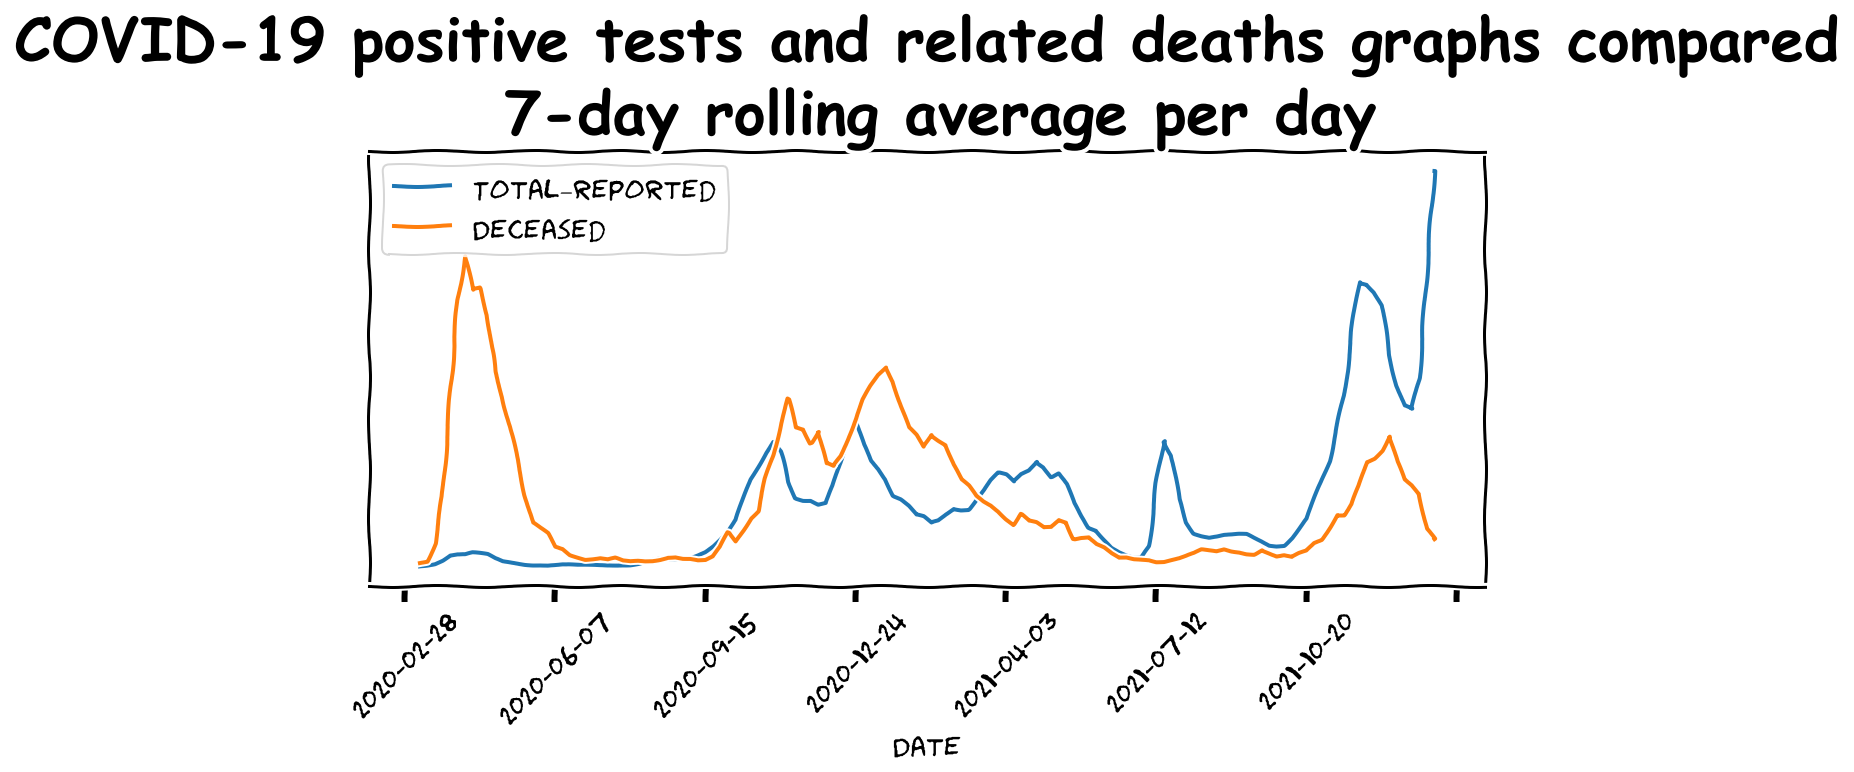

In [240]:
# plt.xkcd();
df_scaled[['Total_reported','Deceased']].rolling(7).mean()[::5].plot(legend=True, figsize=(10,4))
plt.xticks(rotation=45)
plt.yticks([])
plt.title('COVID-19 positive tests and related deaths graphs compared\n 7-day rolling average per day', fontname="Comic Sans MS", fontsize=30, fontweight="bold")

# plt.ylabel()


plt.xlabel('Date')
# ax.axis('off');



In [197]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

rob_scaler = RobustScaler()
 
df_Rscaled = rob_scaler.fit_transform(groupedDate.to_numpy())
df_Rscaled = pd.DataFrame(df_Rscaled, columns=['Total_reported','Hospital_admission','Deceased'], index = groupedDate.index)

<AxesSubplot:xlabel='Date_of_publication'>

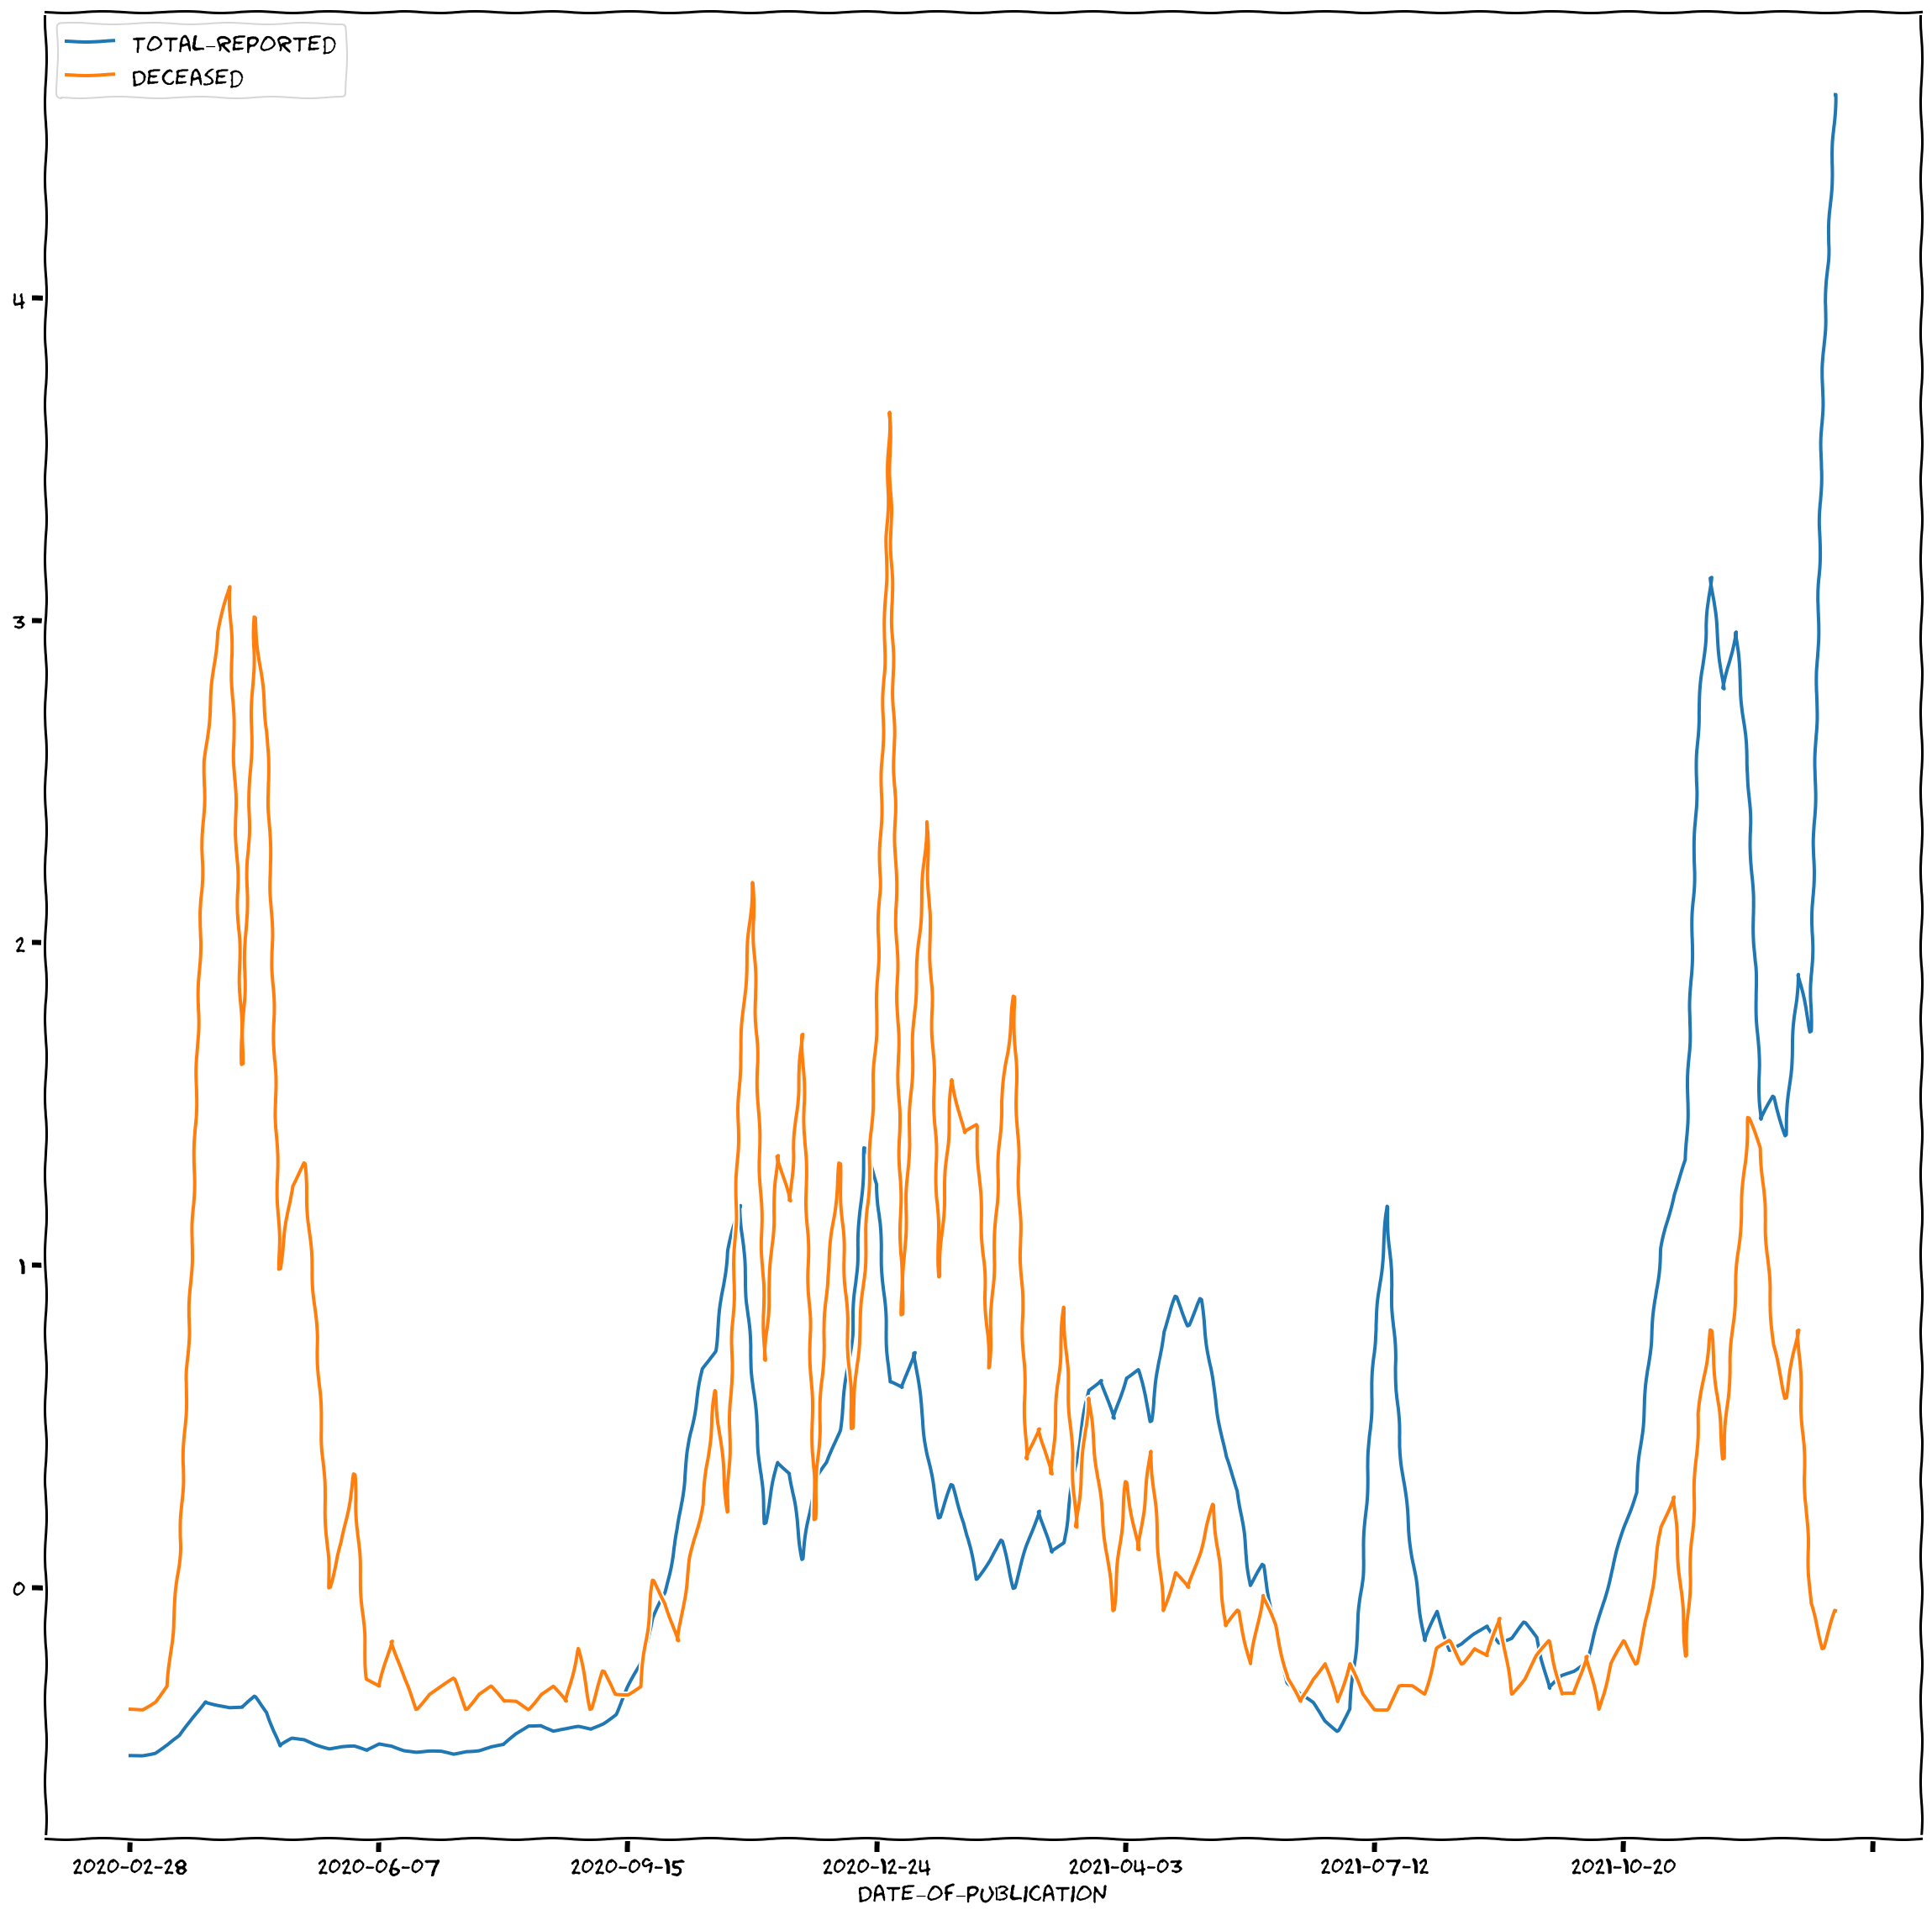

In [198]:
df_Rscaled[['Total_reported','Deceased']][::5].plot(figsize=(20,20))

Total_reported  Hospital_admission  Deceased
Date_of_publication                                              
2020-02-28                        1                   1         0
2020-02-29                        1                   0         0
2020-03-01                        3                   1         0
2020-03-02                        5                   0         0
2020-03-03                        4                   1         0
...                             ...                 ...       ...
2022-01-10                    27933                  31         8
2022-01-11                    29039                  31        18
2022-01-12                    32109                  35         8
2022-01-13                    33409                  62        13
2022-01-14                    35521                  52        16

[687 rows x 3 columns]

<AxesSubplot:xlabel='Date_of_publication'>

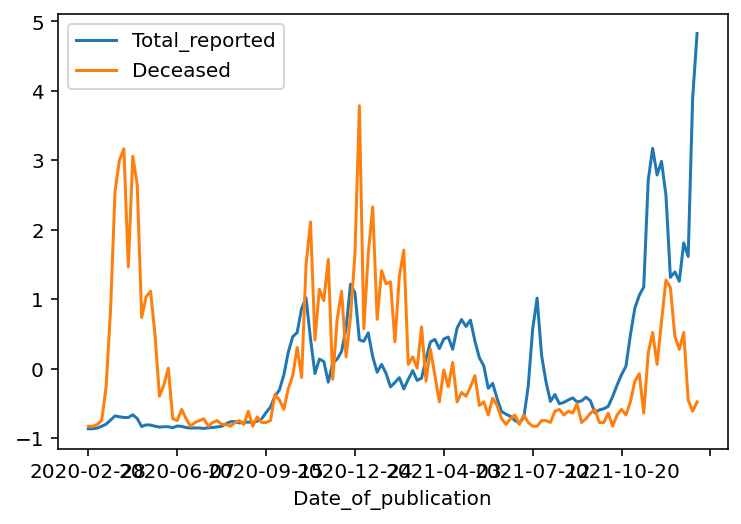

In [180]:
df_scaled[['Total_reported','Deceased']][::5].plot()

<AxesSubplot:xlabel='Date_of_publication'>

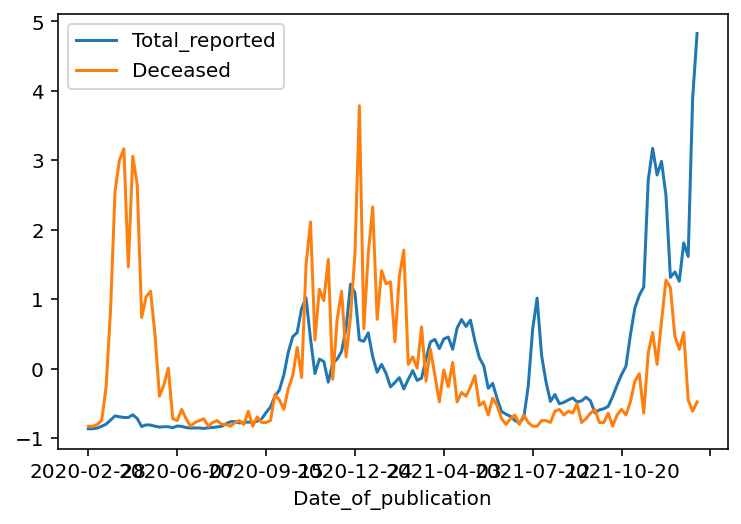

In [180]:
df_scaled[['Total_reported','Deceased']][::5].plot()

<AxesSubplot:xlabel='Date_of_publication'>

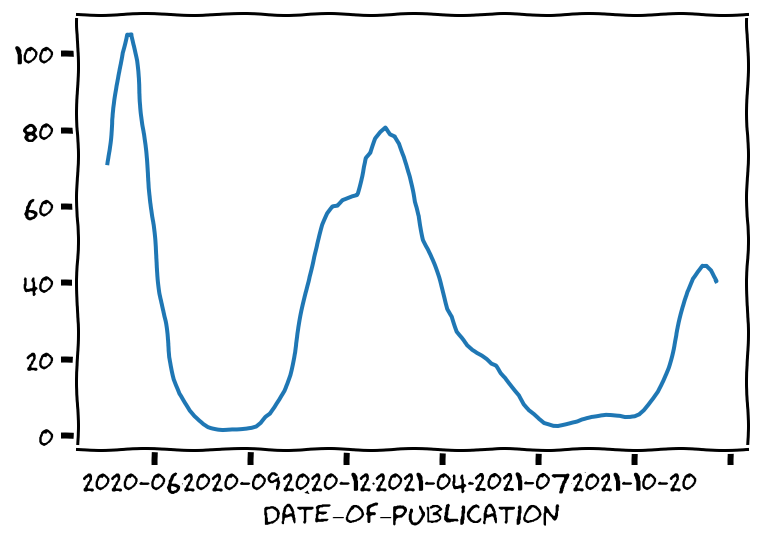

In [199]:
groupedDate['Deceased'].rolling(50).mean()[::5].plot()

<AxesSubplot:xlabel='Date_of_publication'>

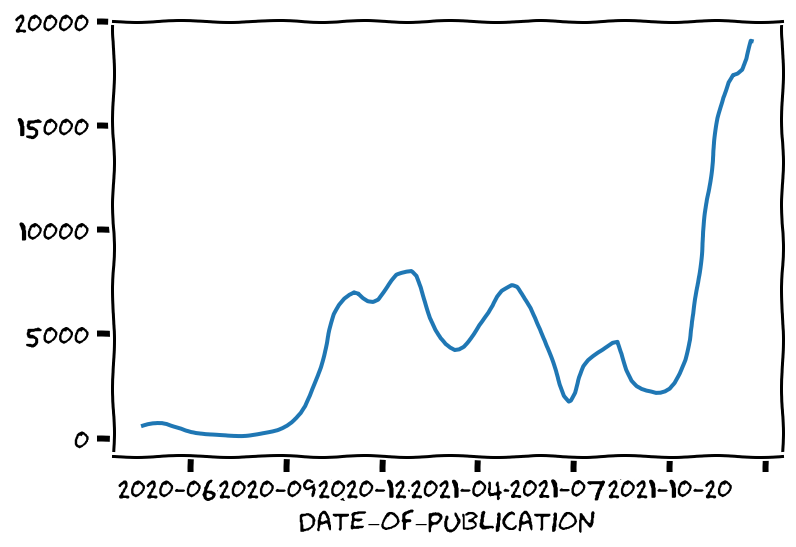

In [200]:
groupedDate['Total_reported'].rolling(50).mean()[::5].plot()

<AxesSubplot:xlabel='Date_of_publication'>

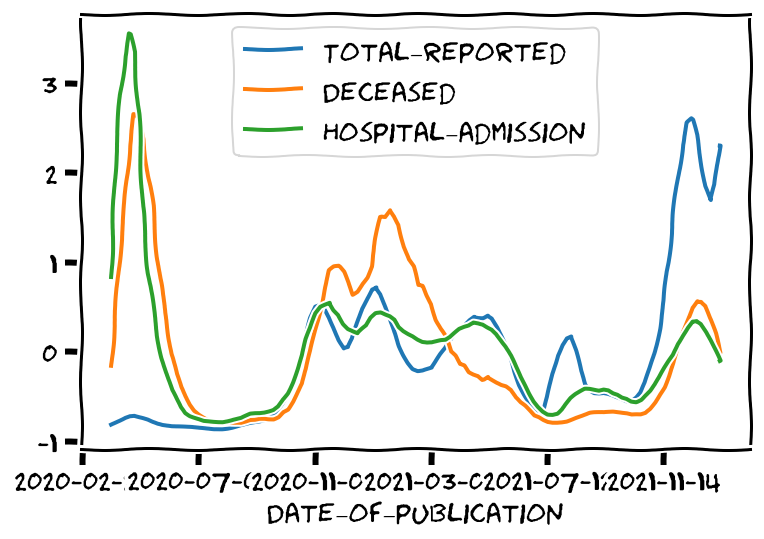

In [201]:
df_scaled[['Total_reported','Deceased','Hospital_admission']].rolling(30).mean()[::5].plot()

In [10]:
import tabula
df_ = tabula.read_pdf('/Users/maartenk/Documents/git/CookBooks/Sources/Kiemsurveillance-20220114-tabel-Nederlands.pdf',
                      output_format='dataframe',
                     pages='all')

In [11]:
# display each of the dataframes
for df in df_:
    print(df.shape)
    df.head()

(10, 59)


In [12]:
df_ = df_[0]

In [13]:
df_['virus'] = df_['Weeknummer']

In [14]:
df_ = df_.drop('Weeknummer', axis=1)
# df_['Weeknummer']

In [15]:
df_

Totaal  2021/52  2021/51  2021/50  2021/49  2021/48  2021/47  2021/46  \
0  76838.0    611.0   1489.0   1830.0   1877.0   1896.0   1927.0   1894.0   
1  26267.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2    439.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3    384.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  43486.0    254.0   1061.0   1663.0   1848.0   1885.0   1923.0   1894.0   
5    463.0      3.0     50.0     58.0     60.0     50.0     50.0     44.0   
6     46.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7     11.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8    994.0    357.0    428.0    166.0     28.0     11.0      4.0      0.0   
9      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2021/45  2021/44  ...  2021/4  2021/3  2021/2  2021/1  2020/53  2020/52  \
0   1803.0   1994.0  ...   876.0   651.0   305.0   356.0    207.0    257.0   
1      0.0      0.0  ...   216.0   158.0    60.0    45.0      9.0      5.0   
2      0.0      0.0  ...    14.0     3.0     3.0     0.0      1.0      1.0   
3      0.0      0.0  ...     1.0     0.0     0.0     0.0      0.0      0.0   
4   1803.0   1994.0  ...     0.0     0.0     2.0     0.0      0.0      0.0   
5     42.0     42.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
6      0.0      0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
7      0.0      0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
8      0.0      0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
9      NaN      NaN  ...     NaN     NaN     NaN     NaN      NaN      NaN   

   2020/51  2020/50  2020/49                        virus  
0    203.0    127.0     75.0  Aantal onderzochte monsters  
1      1.0      1.0      1.0               Alfa (B.1.1.7)  
2      0.0      0.0      0.0               Beta (B.1.351)  
3      0.0      0.0      0.0                  Gamma (P.1)  
4      0.0      0.0      0.0            Delta (B.1.617.2)  
5      0.0      0.0      0.0                      AY.4.2*  
6      0.0      0.0      0.0                 Mu (B.1.621)  
7      0.0      0.0      0.0                Lambda (C.37)  
8      0.0      0.0      0.0          Omikron (B.1.1.529)  
9      NaN      NaN      NaN                          NaN  

[10 rows x 59 columns]

In [16]:
df_ = df_.drop('Totaal', axis=1)

In [17]:
df_

2021/52  2021/51  2021/50  2021/49  2021/48  2021/47  2021/46  2021/45  \
0    611.0   1489.0   1830.0   1877.0   1896.0   1927.0   1894.0   1803.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4    254.0   1061.0   1663.0   1848.0   1885.0   1923.0   1894.0   1803.0   
5      3.0     50.0     58.0     60.0     50.0     50.0     44.0     42.0   
6      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8    357.0    428.0    166.0     28.0     11.0      4.0      0.0      0.0   
9      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2021/44  2021/43  ...  2021/4  2021/3  2021/2  2021/1  2020/53  2020/52  \
0   1994.0   1913.0  ...   876.0   651.0   305.0   356.0    207.0    257.0   
1      0.0      0.0  ...   216.0   158.0    60.0    45.0      9.0      5.0   
2      0.0      0.0  ...    14.0     3.0     3.0     0.0      1.0      1.0   
3      0.0      0.0  ...     1.0     0.0     0.0     0.0      0.0      0.0   
4   1994.0   1912.0  ...     0.0     0.0     2.0     0.0      0.0      0.0   
5     42.0     23.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
6      0.0      0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
7      0.0      0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
8      0.0      0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
9      NaN      NaN  ...     NaN     NaN     NaN     NaN      NaN      NaN   

   2020/51  2020/50  2020/49                        virus  
0    203.0    127.0     75.0  Aantal onderzochte monsters  
1      1.0      1.0      1.0               Alfa (B.1.1.7)  
2      0.0      0.0      0.0               Beta (B.1.351)  
3      0.0      0.0      0.0                  Gamma (P.1)  
4      0.0      0.0      0.0            Delta (B.1.617.2)  
5      0.0      0.0      0.0                      AY.4.2*  
6      0.0      0.0      0.0                 Mu (B.1.621)  
7      0.0      0.0      0.0                Lambda (C.37)  
8      0.0      0.0      0.0          Omikron (B.1.1.529)  
9      NaN      NaN      NaN                          NaN  

[10 rows x 58 columns]

In [18]:
df_ = pd.DataFrame(df_, columns=df_.columns[::-1])

In [19]:
df_=df_.drop(0)

In [20]:
df_ = df_.set_index('virus')

In [21]:
df_# = df_.T

2020/49  2020/50  2020/51  2020/52  2020/53  2021/1  \
virus                                                                      
Alfa (B.1.1.7)           1.0      1.0      1.0      5.0      9.0    45.0   
Beta (B.1.351)           0.0      0.0      0.0      1.0      1.0     0.0   
Gamma (P.1)              0.0      0.0      0.0      0.0      0.0     0.0   
Delta (B.1.617.2)        0.0      0.0      0.0      0.0      0.0     0.0   
AY.4.2*                  0.0      0.0      0.0      0.0      0.0     0.0   
Mu (B.1.621)             0.0      0.0      0.0      0.0      0.0     0.0   
Lambda (C.37)            0.0      0.0      0.0      0.0      0.0     0.0   
Omikron (B.1.1.529)      0.0      0.0      0.0      0.0      0.0     0.0   
NaN                      NaN      NaN      NaN      NaN      NaN     NaN   

                     2021/2  2021/3  2021/4  2021/5  ...  2021/43  2021/44  \
virus                                                ...                     
Alfa (B.1.1.7)         60.0   158.0   216.0   206.0  ...      0.0      0.0   
Beta (B.1.351)          3.0     3.0    14.0    18.0  ...      0.0      0.0   
Gamma (P.1)             0.0     0.0     1.0     0.0  ...      0.0      0.0   
Delta (B.1.617.2)       2.0     0.0     0.0     0.0  ...   1912.0   1994.0   
AY.4.2*                 0.0     0.0     0.0     0.0  ...     23.0     42.0   
Mu (B.1.621)            0.0     0.0     0.0     0.0  ...      0.0      0.0   
Lambda (C.37)           0.0     0.0     0.0     0.0  ...      0.0      0.0   
Omikron (B.1.1.529)     0.0     0.0     0.0     0.0  ...      0.0      0.0   
NaN                     NaN     NaN     NaN     NaN  ...      NaN      NaN   

                     2021/45  2021/46  2021/47  2021/48  2021/49  2021/50  \
virus                                                                       
Alfa (B.1.1.7)           0.0      0.0      0.0      0.0      0.0      0.0   
Beta (B.1.351)           0.0      0.0      0.0      0.0      0.0      0.0   
Gamma (P.1)              0.0      0.0      0.0      0.0      0.0      0.0   
Delta (B.1.617.2)     1803.0   1894.0   1923.0   1885.0   1848.0   1663.0   
AY.4.2*                 42.0     44.0     50.0     50.0     60.0     58.0   
Mu (B.1.621)             0.0      0.0      0.0      0.0      0.0      0.0   
Lambda (C.37)            0.0      0.0      0.0      0.0      0.0      0.0   
Omikron (B.1.1.529)      0.0      0.0      4.0     11.0     28.0    166.0   
NaN                      NaN      NaN      NaN      NaN      NaN      NaN   

                     2021/51  2021/52  
virus                                  
Alfa (B.1.1.7)           0.0      0.0  
Beta (B.1.351)           0.0      0.0  
Gamma (P.1)              0.0      0.0  
Delta (B.1.617.2)     1061.0    254.0  
AY.4.2*                 50.0      3.0  
Mu (B.1.621)             0.0      0.0  
Lambda (C.37)            0.0      0.0  
Omikron (B.1.1.529)    428.0    357.0  
NaN                      NaN      NaN  

[9 rows x 57 columns]

In [22]:
df_.columns

Index(['2020/49', '2020/50', '2020/51', '2020/52', '2020/53', '2021/1',
       '2021/2', '2021/3', '2021/4', '2021/5', '2021/6', '2021/7', '2021/8',
       '2021/9', '2021/10', '2021/11', '2021/12', '2021/13', '2021/14',
       '2021/15', '2021/16', '2021/17', '2021/18', '2021/19', '2021/20',
       '2021/21', '2021/22', '2021/23', '2021/24', '2021/25', '2021/26',
       '2021/27', '2021/28', '2021/29', '2021/30', '2021/31', '2021/32',
       '2021/33', '2021/34', '2021/35', '2021/36', '2021/37', '2021/38',
       '2021/39', '2021/40', '2021/41', '2021/42', '2021/43', '2021/44',
       '2021/45', '2021/46', '2021/47', '2021/48', '2021/49', '2021/50',
       '2021/51', '2021/52'],
      dtype='object')

In [23]:
df_['wk']=[w [-2:] for w in df_.columns]

ValueError: Length of values (57) does not match length of index (9)

In [24]:
df_.yr = [y [:4] for y in df_.columns]

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [25]:
import datetime
y='2020'
w='-30'

r = datetime.datetime.strptime(y+ w + '-1', '%Y-%W-%w' )
# wkyr = [time.asctime(time.strptime('{} {} 1'.format(y,w), '%Y, %W ')) for y,w in y,w]
# wkyr = [time.asctime(time.strptime('{} {} 1'.format(y,w), '%Y, %W ')) for y,w in y,w]

# time.asctime(time.strptime(f'{y} {w}', '%Y, %W')) #for y,w in y,w]

print(r)

2020-07-27 00:00:00


In [26]:
df_

2020/49  2020/50  2020/51  2020/52  2020/53  2021/1  \
virus                                                                      
Alfa (B.1.1.7)           1.0      1.0      1.0      5.0      9.0    45.0   
Beta (B.1.351)           0.0      0.0      0.0      1.0      1.0     0.0   
Gamma (P.1)              0.0      0.0      0.0      0.0      0.0     0.0   
Delta (B.1.617.2)        0.0      0.0      0.0      0.0      0.0     0.0   
AY.4.2*                  0.0      0.0      0.0      0.0      0.0     0.0   
Mu (B.1.621)             0.0      0.0      0.0      0.0      0.0     0.0   
Lambda (C.37)            0.0      0.0      0.0      0.0      0.0     0.0   
Omikron (B.1.1.529)      0.0      0.0      0.0      0.0      0.0     0.0   
NaN                      NaN      NaN      NaN      NaN      NaN     NaN   

                     2021/2  2021/3  2021/4  2021/5  ...  2021/43  2021/44  \
virus                                                ...                     
Alfa (B.1.1.7)         60.0   158.0   216.0   206.0  ...      0.0      0.0   
Beta (B.1.351)          3.0     3.0    14.0    18.0  ...      0.0      0.0   
Gamma (P.1)             0.0     0.0     1.0     0.0  ...      0.0      0.0   
Delta (B.1.617.2)       2.0     0.0     0.0     0.0  ...   1912.0   1994.0   
AY.4.2*                 0.0     0.0     0.0     0.0  ...     23.0     42.0   
Mu (B.1.621)            0.0     0.0     0.0     0.0  ...      0.0      0.0   
Lambda (C.37)           0.0     0.0     0.0     0.0  ...      0.0      0.0   
Omikron (B.1.1.529)     0.0     0.0     0.0     0.0  ...      0.0      0.0   
NaN                     NaN     NaN     NaN     NaN  ...      NaN      NaN   

                     2021/45  2021/46  2021/47  2021/48  2021/49  2021/50  \
virus                                                                       
Alfa (B.1.1.7)           0.0      0.0      0.0      0.0      0.0      0.0   
Beta (B.1.351)           0.0      0.0      0.0      0.0      0.0      0.0   
Gamma (P.1)              0.0      0.0      0.0      0.0      0.0      0.0   
Delta (B.1.617.2)     1803.0   1894.0   1923.0   1885.0   1848.0   1663.0   
AY.4.2*                 42.0     44.0     50.0     50.0     60.0     58.0   
Mu (B.1.621)             0.0      0.0      0.0      0.0      0.0      0.0   
Lambda (C.37)            0.0      0.0      0.0      0.0      0.0      0.0   
Omikron (B.1.1.529)      0.0      0.0      4.0     11.0     28.0    166.0   
NaN                      NaN      NaN      NaN      NaN      NaN      NaN   

                     2021/51  2021/52  
virus                                  
Alfa (B.1.1.7)           0.0      0.0  
Beta (B.1.351)           0.0      0.0  
Gamma (P.1)              0.0      0.0  
Delta (B.1.617.2)     1061.0    254.0  
AY.4.2*                 50.0      3.0  
Mu (B.1.621)             0.0      0.0  
Lambda (C.37)            0.0      0.0  
Omikron (B.1.1.529)    428.0    357.0  
NaN                      NaN      NaN  

[9 rows x 57 columns]

In [32]:
df_ = df_.T

In [33]:
df_.index

Index(['2021/52', '2021/51', '2021/50', '2021/49', '2021/48', '2021/47',
       '2021/46', '2021/45', '2021/44', '2021/43', '2021/42', '2021/41',
       '2021/40', '2021/39', '2021/38', '2021/37', '2021/36', '2021/35',
       '2021/34', '2021/33', '2021/32', '2021/31', '2021/30', '2021/29',
       '2021/28', '2021/27', '2021/26', '2021/25', '2021/24', '2021/23',
       '2021/22', '2021/21', '2021/20', '2021/19', '2021/18', '2021/17',
       '2021/16', '2021/15', '2021/14', '2021/13', '2021/12', '2021/11',
       '2021/10', '2021/9', '2021/8', '2021/7', '2021/6', '2021/5', '2021/4',
       '2021/3', '2021/2', '2021/1', '2020/53', '2020/52', '2020/51',
       '2020/50', '2020/49'],
      dtype='object')

In [34]:
df_ = pd.DataFrame(df_, columns=df_.columns[::-1])

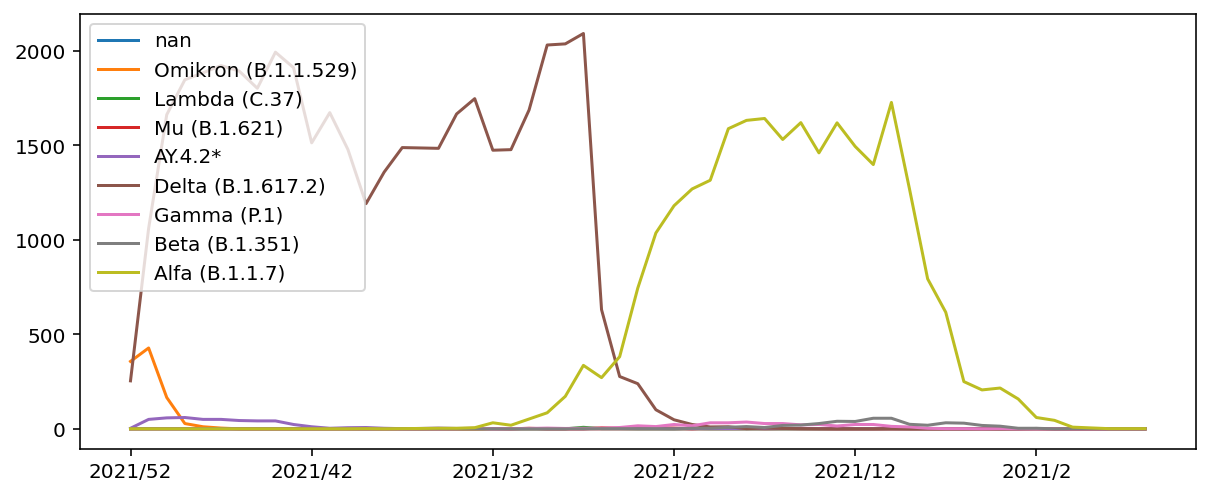

In [35]:
plt.rcdefaults
df_.plot(figsize=(10,4))
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

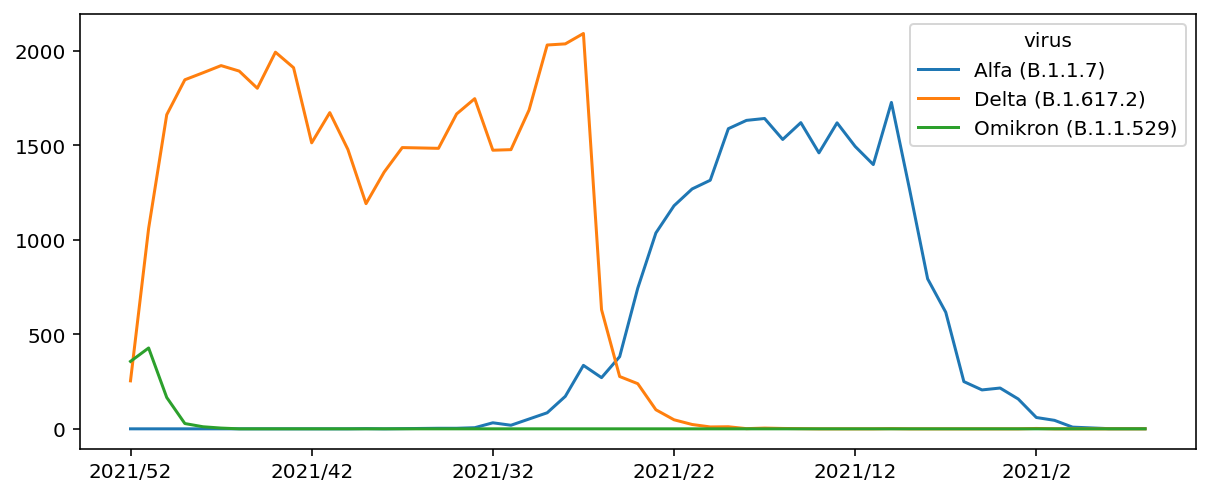

In [36]:
df_[['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)']].plot(figsize=(10,4));

In [39]:
# df_.loc[['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)']].plot()

<AxesSubplot:>

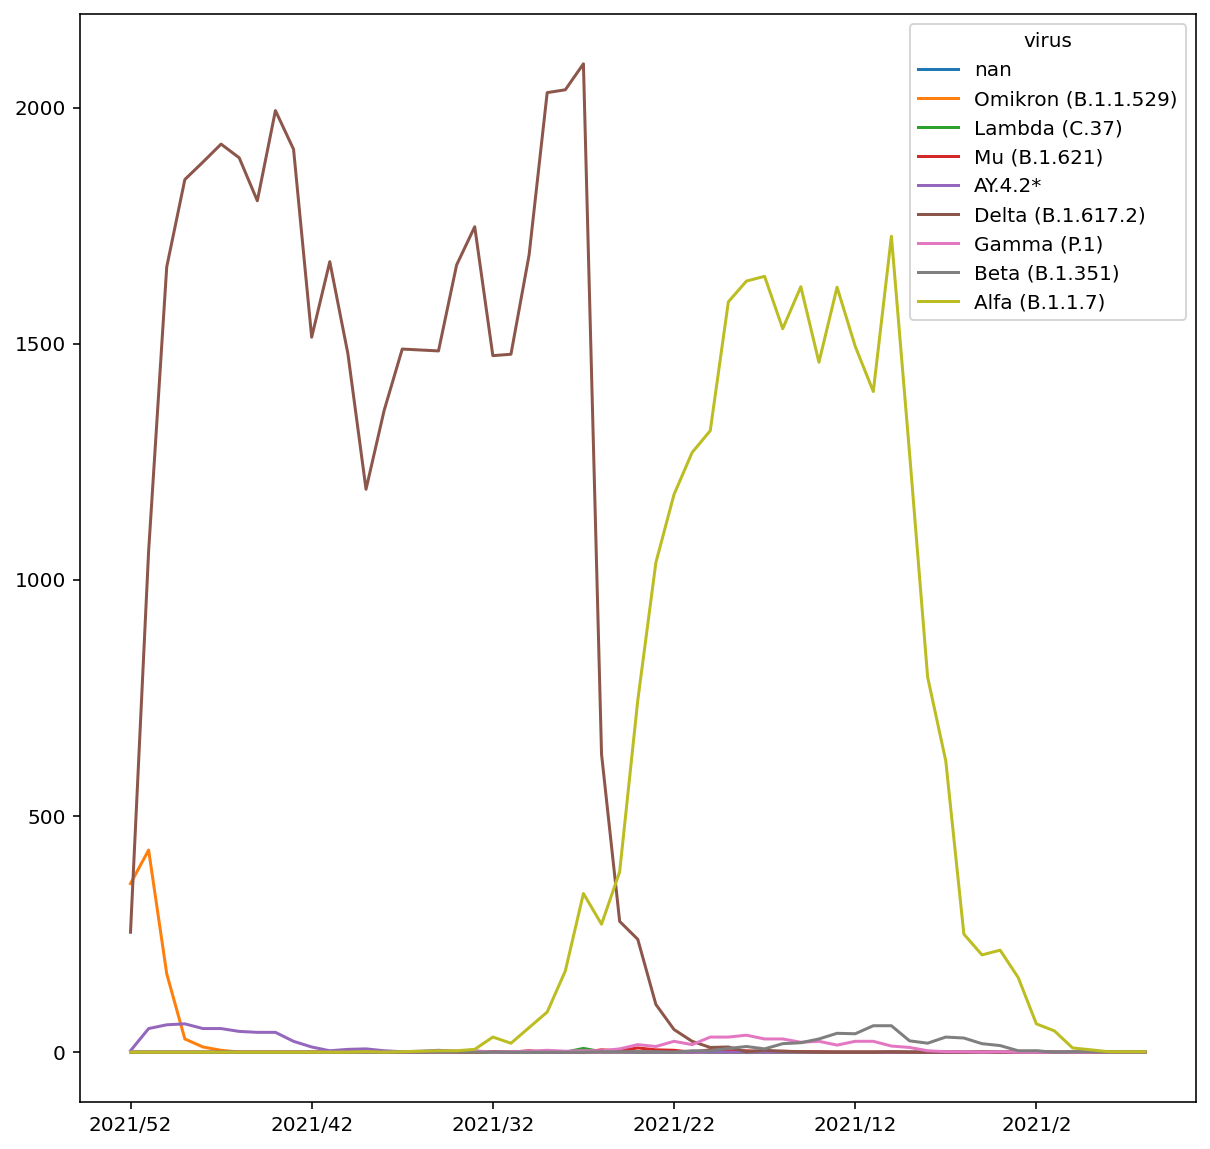

In [38]:
df_.plot(figsize=(10,10))

In [40]:
df_.T

2021/52  2021/51  2021/50  2021/49  2021/48  2021/47  \
virus                                                                       
NaN                      NaN      NaN      NaN      NaN      NaN      NaN   
Omikron (B.1.1.529)    357.0    428.0    166.0     28.0     11.0      4.0   
Lambda (C.37)            0.0      0.0      0.0      0.0      0.0      0.0   
Mu (B.1.621)             0.0      0.0      0.0      0.0      0.0      0.0   
AY.4.2*                  3.0     50.0     58.0     60.0     50.0     50.0   
Delta (B.1.617.2)      254.0   1061.0   1663.0   1848.0   1885.0   1923.0   
Gamma (P.1)              0.0      0.0      0.0      0.0      0.0      0.0   
Beta (B.1.351)           0.0      0.0      0.0      0.0      0.0      0.0   
Alfa (B.1.1.7)           0.0      0.0      0.0      0.0      0.0      0.0   

                     2021/46  2021/45  2021/44  2021/43  ...  2021/5  2021/4  \
virus                                                    ...                   
NaN                      NaN      NaN      NaN      NaN  ...     NaN     NaN   
Omikron (B.1.1.529)      0.0      0.0      0.0      0.0  ...     0.0     0.0   
Lambda (C.37)            0.0      0.0      0.0      0.0  ...     0.0     0.0   
Mu (B.1.621)             0.0      0.0      0.0      0.0  ...     0.0     0.0   
AY.4.2*                 44.0     42.0     42.0     23.0  ...     0.0     0.0   
Delta (B.1.617.2)     1894.0   1803.0   1994.0   1912.0  ...     0.0     0.0   
Gamma (P.1)              0.0      0.0      0.0      0.0  ...     0.0     1.0   
Beta (B.1.351)           0.0      0.0      0.0      0.0  ...    18.0    14.0   
Alfa (B.1.1.7)           0.0      0.0      0.0      0.0  ...   206.0   216.0   

                     2021/3  2021/2  2021/1  2020/53  2020/52  2020/51  \
virus                                                                    
NaN                     NaN     NaN     NaN      NaN      NaN      NaN   
Omikron (B.1.1.529)     0.0     0.0     0.0      0.0      0.0      0.0   
Lambda (C.37)           0.0     0.0     0.0      0.0      0.0      0.0   
Mu (B.1.621)            0.0     0.0     0.0      0.0      0.0      0.0   
AY.4.2*                 0.0     0.0     0.0      0.0      0.0      0.0   
Delta (B.1.617.2)       0.0     2.0     0.0      0.0      0.0      0.0   
Gamma (P.1)             0.0     0.0     0.0      0.0      0.0      0.0   
Beta (B.1.351)          3.0     3.0     0.0      1.0      1.0      0.0   
Alfa (B.1.1.7)        158.0    60.0    45.0      9.0      5.0      1.0   

                     2020/50  2020/49  
virus                                  
NaN                      NaN      NaN  
Omikron (B.1.1.529)      0.0      0.0  
Lambda (C.37)            0.0      0.0  
Mu (B.1.621)             0.0      0.0  
AY.4.2*                  0.0      0.0  
Delta (B.1.617.2)        0.0      0.0  
Gamma (P.1)              0.0      0.0  
Beta (B.1.351)           0.0      0.0  
Alfa (B.1.1.7)           1.0      1.0  

[9 rows x 57 columns]

In [41]:
# !ls CookBooks/Sources
dfe = pd.read_excel('CookBooks/Sources/ExpectedDeathsCoViD.xlsx')

dfe.head()

year  week  Deceased  Expected  ExpectedLow95  ExpectedHigh95
0  2020   1.0    3103.0    3277.0         2908.0          3645.0
1  2020   2.0    3364.0    3311.0         2930.0          3692.0
2  2020   3.0    3157.0    3344.0         2945.0          3742.0
3  2020   4.0    3046.0    3392.0         3008.0          3776.0
4  2020   5.0    3164.0    3407.0         3027.0          3788.0

In [42]:
dfe['week'] = dfe['week'].astype('Int64').astype(str)

In [43]:
dfe['Weeknummer'] = dfe['year']+'/'+(dfe['week'])

In [44]:
dfe = dfe.set_index('Weeknummer')

In [45]:
dfe.head()

year week  Deceased  Expected  ExpectedLow95  ExpectedHigh95
Weeknummer                                                              
2020/1      2020    1    3103.0    3277.0         2908.0          3645.0
2020/2      2020    2    3364.0    3311.0         2930.0          3692.0
2020/3      2020    3    3157.0    3344.0         2945.0          3742.0
2020/4      2020    4    3046.0    3392.0         3008.0          3776.0
2020/5      2020    5    3164.0    3407.0         3027.0          3788.0

In [46]:
dfe = dfe[:-1]

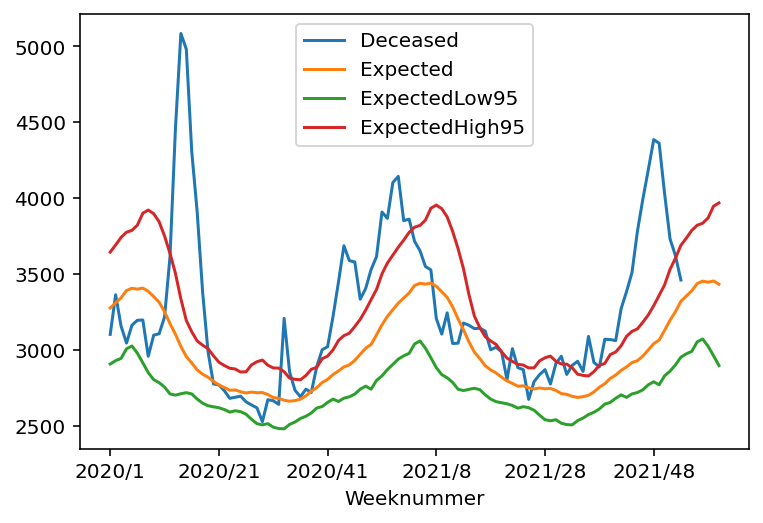

In [47]:
dfe[['Deceased','Expected','ExpectedLow95','ExpectedHigh95']].plot();

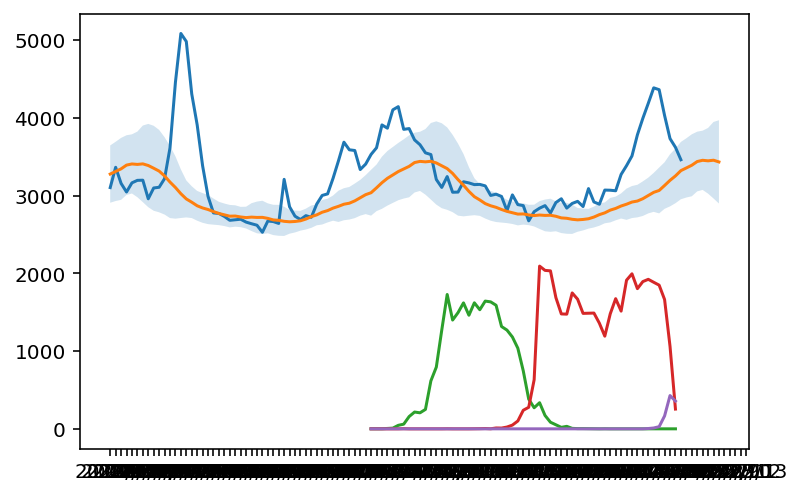

In [48]:
fig, ax = plt.subplots()
ax.plot(dfe.index, dfe[['Deceased','Expected']])#,'ExpectedLow95','ExpectedHigh95']], '-')
ax.fill_between(dfe.index, dfe['ExpectedLow95'], dfe['ExpectedHigh95'], alpha=0.2)
ax.plot(df_.index, df_[['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)']])

In [49]:
dfe.index

Index(['2020/1', '2020/2', '2020/3', '2020/4', '2020/5', '2020/6', '2020/7',
       '2020/8', '2020/9', '2020/10',
       ...
       '2022/43', '2022/44', '2022/45', '2022/46', '2022/47', '2022/48',
       '2022/49', '2022/50', '2022/51', '2022/52'],
      dtype='object', name='Weeknummer', length=157)

In [55]:
groupedDate['temp'] = groupedDate.index

In [56]:
groupedDate.head()

Total_reported  Hospital_admission  Deceased        temp
Date_of_publication                                                          
2020-02-28                        1                   1         0  2020-02-28
2020-02-29                        1                   0         0  2020-02-29
2020-03-01                        3                   1         0  2020-03-01
2020-03-02                        5                   0         0  2020-03-02
2020-03-03                        4                   1         0  2020-03-03

In [57]:
from datetime import datetime
groupedDate['temp'] = groupedDate['temp'].str.replace('-', '/')

# groupedDate['temp_t'] = datetime.strptime(groupedDate['temp'], '%y-%m-%d')

In [60]:
groupedDate['temp_t']=pd.to_datetime(groupedDate['temp'], format='%Y/%M/%d')


In [62]:
groupedDate.head()

Total_reported  Hospital_admission  Deceased        temp  \
Date_of_publication                                                             
2020-02-28                        1                   1         0  2020/02/28   
2020-02-29                        1                   0         0  2020/02/29   
2020-03-01                        3                   1         0  2020/03/01   
2020-03-02                        5                   0         0  2020/03/02   
2020-03-03                        4                   1         0  2020/03/03   

                                 temp_t  
Date_of_publication                      
2020-02-28          2020-01-28 00:02:00  
2020-02-29          2020-01-29 00:02:00  
2020-03-01          2020-01-01 00:03:00  
2020-03-02          2020-01-02 00:03:00  
2020-03-03          2020-01-03 00:03:00

In [64]:
groupedDate.dtypes

Total_reported                 int64
Hospital_admission             int64
Deceased                       int64
temp                          object
temp_t                datetime64[ns]
dtype: object

In [69]:
df_.index.inferred_type

'string'

In [71]:
dfe.head()

year week  Deceased  Expected  ExpectedLow95  ExpectedHigh95
Weeknummer                                                              
2020/1      2020    1    3103.0    3277.0         2908.0          3645.0
2020/2      2020    2    3364.0    3311.0         2930.0          3692.0
2020/3      2020    3    3157.0    3344.0         2945.0          3742.0
2020/4      2020    4    3046.0    3392.0         3008.0          3776.0
2020/5      2020    5    3164.0    3407.0         3027.0          3788.0

In [72]:
import datetime

def weeknum_to_dates(weeknum):
    return [datetime.datetime.strptime({dfe['year']+ str(weeknum) + str(x), "%Y-W%W-%w").strftime('%d.%m.%Y') 
            for x in range(-5,0)]

weeknum_to_dates(37)

['17.09.2021', '16.09.2021', '15.09.2021', '14.09.2021', '13.09.2021']

In [86]:
import datetime
# d = dfe['year'][3] + '-' + dfe['week'][3]
def wk2date(yr, wk):
    r = datetime.datetime.strptime(yr +'-'+wk + '-1', "%Y-%W-%w")
    return r
dfe['Q'] = dfe.apply(lambda dfe:wk2date(dfe['year'],dfe['week']), axis=1)
dfe.head()

year week  Deceased  Expected  ExpectedLow95  ExpectedHigh95  \
Weeknummer                                                                 
2020/1      2020    1    3103.0    3277.0         2908.0          3645.0   
2020/2      2020    2    3364.0    3311.0         2930.0          3692.0   
2020/3      2020    3    3157.0    3344.0         2945.0          3742.0   
2020/4      2020    4    3046.0    3392.0         3008.0          3776.0   
2020/5      2020    5    3164.0    3407.0         3027.0          3788.0   

                    Q  
Weeknummer             
2020/1     2020-01-06  
2020/2     2020-01-13  
2020/3     2020-01-20  
2020/4     2020-01-27  
2020/5     2020-02-03

In [85]:
wk2date(dfe['year'],dfe['week'])

datetime.datetime(2020, 1, 27, 0, 0)

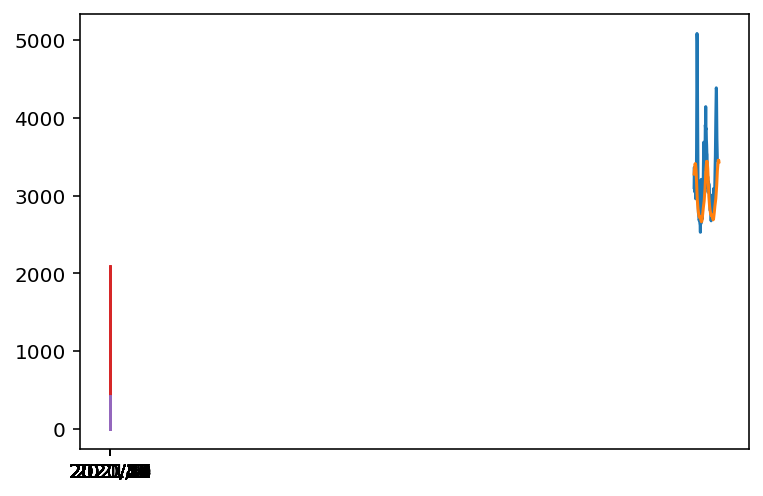

In [89]:
fig, ax = plt.subplots()
ax.plot(dfe.Q, dfe[['Deceased','Expected']])#,'ExpectedLow95','ExpectedHigh95']], '-')
ax.fill_between(dfe.Q, dfe['ExpectedLow95'], dfe['ExpectedHigh95'], alpha=0.2)
ax.plot(df_.index, df_[['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)']])

In [90]:
df_.index

Index(['2021/52', '2021/51', '2021/50', '2021/49', '2021/48', '2021/47',
       '2021/46', '2021/45', '2021/44', '2021/43', '2021/42', '2021/41',
       '2021/40', '2021/39', '2021/38', '2021/37', '2021/36', '2021/35',
       '2021/34', '2021/33', '2021/32', '2021/31', '2021/30', '2021/29',
       '2021/28', '2021/27', '2021/26', '2021/25', '2021/24', '2021/23',
       '2021/22', '2021/21', '2021/20', '2021/19', '2021/18', '2021/17',
       '2021/16', '2021/15', '2021/14', '2021/13', '2021/12', '2021/11',
       '2021/10', '2021/9', '2021/8', '2021/7', '2021/6', '2021/5', '2021/4',
       '2021/3', '2021/2', '2021/1', '2020/53', '2020/52', '2020/51',
       '2020/50', '2020/49'],
      dtype='object')

In [92]:
df_['temp'] = df_.index.copy()

In [96]:
df_['year'] =  [x[:4] for x in df_['temp']]

In [100]:
df_['week'] =  [x[-2:] for x in df_['temp']]

In [106]:
df_['week'] = df_['week'].str.replace('/', '')


In [107]:
import datetime
# d = dfe['year'][3] + '-' + dfe['week'][3]
def wk2date(yr, wk):
    r = datetime.datetime.strptime(yr +'-'+ wk + '-1', "%Y-%W-%w")
    return r
df_['Q'] = df_.apply(lambda df_:wk2date(df_['year'],df_['week']), axis=1)
df_.head()

virus    NaN  Omikron (B.1.1.529)  Lambda (C.37)  Mu (B.1.621)  AY.4.2*  \
2021/52  NaN                357.0            0.0           0.0      3.0   
2021/51  NaN                428.0            0.0           0.0     50.0   
2021/50  NaN                166.0            0.0           0.0     58.0   
2021/49  NaN                 28.0            0.0           0.0     60.0   
2021/48  NaN                 11.0            0.0           0.0     50.0   

virus    Delta (B.1.617.2)  Gamma (P.1)  Beta (B.1.351)  Alfa (B.1.1.7)  \
2021/52              254.0          0.0             0.0             0.0   
2021/51             1061.0          0.0             0.0             0.0   
2021/50             1663.0          0.0             0.0             0.0   
2021/49             1848.0          0.0             0.0             0.0   
2021/48             1885.0          0.0             0.0             0.0   

virus       temp  year week          Q  
2021/52  2021/52  2021   52 2021-12-27  
2021/51  2021/51  2021   51 2021-12-20  
2021/50  2021/50  2021   50 2021-12-13  
2021/49  2021/49  2021   49 2021-12-06  
2021/48  2021/48  2021   48 2021-11-29

No handles with labels found to put in legend.


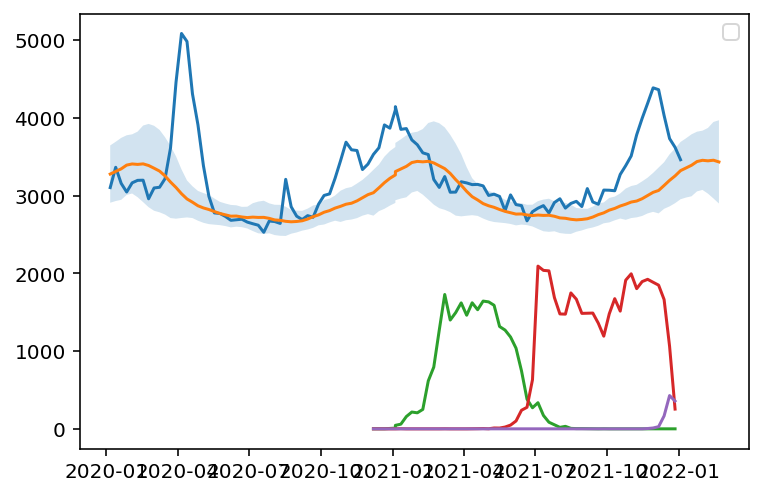

In [109]:
fig, ax = plt.subplots()
ax.plot(dfe.Q, dfe[['Deceased','Expected']])#,'ExpectedLow95','ExpectedHigh95']], '-')
ax.fill_between(dfe.Q, dfe['ExpectedLow95'], dfe['ExpectedHigh95'], alpha=0.2)
ax.plot(df_.Q, df_[['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)']])

In [119]:
df_.head()

virus    NaN  Omikron (B.1.1.529)  Lambda (C.37)  Mu (B.1.621)  AY.4.2*  \
2021/52  NaN                357.0            0.0           0.0      3.0   
2021/51  NaN                428.0            0.0           0.0     50.0   
2021/50  NaN                166.0            0.0           0.0     58.0   
2021/49  NaN                 28.0            0.0           0.0     60.0   
2021/48  NaN                 11.0            0.0           0.0     50.0   

virus    Delta (B.1.617.2)  Gamma (P.1)  Beta (B.1.351)  Alfa (B.1.1.7)  \
2021/52              254.0          0.0             0.0             0.0   
2021/51             1061.0          0.0             0.0             0.0   
2021/50             1663.0          0.0             0.0             0.0   
2021/49             1848.0          0.0             0.0             0.0   
2021/48             1885.0          0.0             0.0             0.0   

virus       temp  year week          Q  
2021/52  2021/52  2021   52 2021-12-27  
2021/51  2021/51  2021   51 2021-12-20  
2021/50  2021/50  2021   50 2021-12-13  
2021/49  2021/49  2021   49 2021-12-06  
2021/48  2021/48  2021   48 2021-11-29

In [129]:
df_.drop('temp', axis=1, inplace=True)

In [124]:
df_.dropna(axis=1, how='all', inplace = True)

In [125]:
df_.head()

virus    Omikron (B.1.1.529)  Lambda (C.37)  Mu (B.1.621)  AY.4.2*  \
2021/52                357.0            0.0           0.0      3.0   
2021/51                428.0            0.0           0.0     50.0   
2021/50                166.0            0.0           0.0     58.0   
2021/49                 28.0            0.0           0.0     60.0   
2021/48                 11.0            0.0           0.0     50.0   

virus    Delta (B.1.617.2)  Gamma (P.1)  Beta (B.1.351)  Alfa (B.1.1.7)  \
2021/52              254.0          0.0             0.0             0.0   
2021/51             1061.0          0.0             0.0             0.0   
2021/50             1663.0          0.0             0.0             0.0   
2021/49             1848.0          0.0             0.0             0.0   
2021/48             1885.0          0.0             0.0             0.0   

virus       temp  year week          Q  
2021/52  2021/52  2021   52 2021-12-27  
2021/51  2021/51  2021   51 2021-12-20  
2021/50  2021/50  2021   50 2021-12-13  
2021/49  2021/49  2021   49 2021-12-06  
2021/48  2021/48  2021   48 2021-11-29

In [131]:
num_cols = df_.columns[df_.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

<AxesSubplot:>

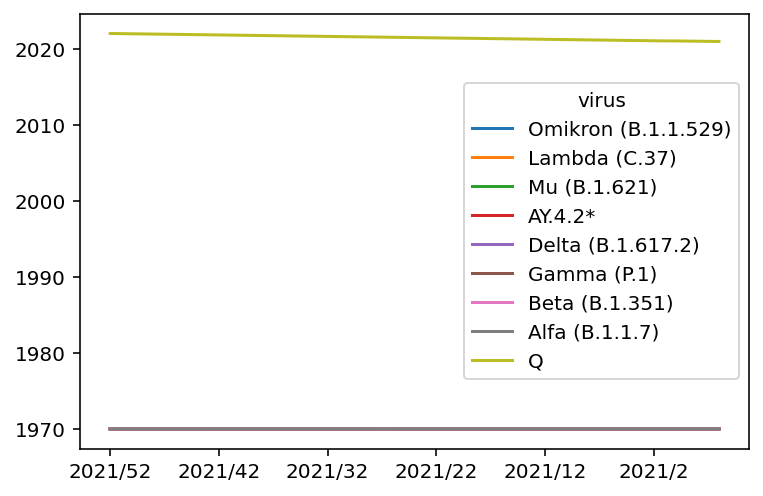

In [139]:
scaler = StandardScaler()

df_[num_cols] = scaler.fit_transform(df_[num_cols])

df_.plot()

In [130]:
from sklearn.preprocessing import StandardScaler 
import pandas as pd

std_scaler = StandardScaler()
 
df__scaled = std_scaler.fit_transform(df_.to_numpy())
df__scaled = pd.DataFrame(df__scaled)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [140]:
num_cols_e = dfe.columns[dfe.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [141]:
num_cols_e

Index(['Deceased', 'Expected', 'ExpectedLow95', 'ExpectedHigh95'], dtype='object')

In [143]:
scaler = StandardScaler()

dfe[num_cols_e] = scaler.fit_transform(dfe[num_cols_e])

In [145]:
dfe

year week  Deceased  Expected  ExpectedLow95  ExpectedHigh95  \
Weeknummer                                                                 
2020/1      2020    1 -0.287792  1.035669       1.131257        0.965970   
2020/2      2020    2  0.216104  1.162189       1.269692        1.086740   
2020/3      2020    3 -0.183538  1.284987       1.364080        1.215217   
2020/4      2020    4 -0.397838  1.463603       1.760507        1.302582   
2020/5      2020    5 -0.170023  1.519421       1.880065        1.333417   
...          ...  ...       ...       ...            ...             ...   
2022/48     2022   48       NaN       NaN            NaN             NaN   
2022/49     2022   49       NaN       NaN            NaN             NaN   
2022/50     2022   50       NaN       NaN            NaN             NaN   
2022/51     2022   51       NaN       NaN            NaN             NaN   
2022/52     2022   52       NaN       NaN            NaN             NaN   

                    Q  
Weeknummer             
2020/1     2020-01-06  
2020/2     2020-01-13  
2020/3     2020-01-20  
2020/4     2020-01-27  
2020/5     2020-02-03  
...               ...  
2022/48    2022-11-28  
2022/49    2022-12-05  
2022/50    2022-12-12  
2022/51    2022-12-19  
2022/52    2022-12-26  

[157 rows x 7 columns]

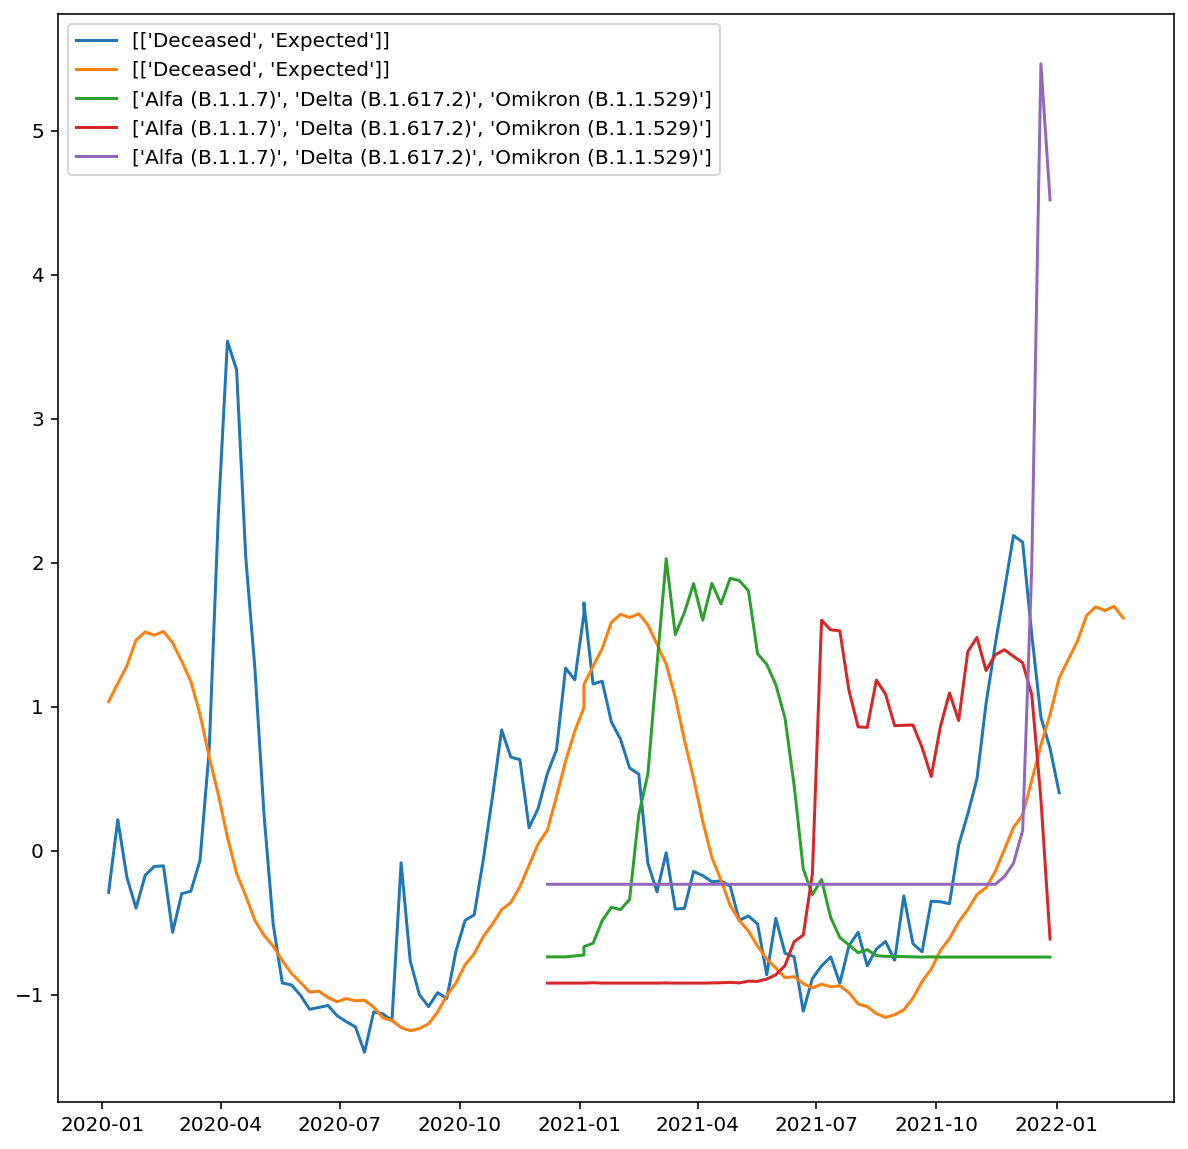

In [158]:
# import matplotlib.dates as mdates
# df_.Q = mdates.epoch2num(df_.Q)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(dfe.Q, dfe[['Deceased','Expected']], label = [['Deceased','Expected']])#,'ExpectedLow95','ExpectedHigh95']], '-')
# ax.fill_between(dfe.Q, dfe['ExpectedLow95'], dfe['ExpectedHigh95'], alpha=0.2,
#                label = 'expected')
# ax.plot(dfe.Q, dfe['ExpectedLow95'], dfe['ExpectedHigh95'], alpha=0.2)
#                label = 'expected')
ax.plot(df_.Q, df_[['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)']],
       label=['Alfa (B.1.1.7)', 'Delta (B.1.617.2)', 'Omikron (B.1.1.529)'] )
ax.legend()